# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель исследования:

1. Определить рыночную стоимость объектов недвижимости в Санкт-Петербурге и соседних населенных пунктов.
2. Установить какие факторы влияют на ценообразование стоимости квартиры. 
3. Найти интересные особенности и зависимости, которые существуют на рынке.

Ход исследования:

Данные о недвижимости я получу из файла '/datasets/real_estate_data.csv'. О данных ничего не известно, поэтому перед исследованием сделаю обзор данных.

Далее проверю данные на пропуски и на выбросы и оценю их влияние на исследование. Затем по возможности исправлю все ошибки данных, которые влияют на конечный результат. Следующим этапом будет создание необходимых столбцов и приступлю к проведению исследовательского анализа. 

Таким образом выделим пять этапов моего исследования:

1) Обзор данных.

2) Предобработка данных.

3) Исследовательский анализ.
  
4) Общий вывод.  



### Обзор данных. 

In [1]:
# импорт библиотек

import pandas as pd
import numpy as np         
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import ipywidgets as widgets

from IPython.display import display



In [2]:
# загрузка данных

df = pd.read_csv('real_estate_data.csv', sep='\t')   

df.head()               


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.shape

(23699, 22)

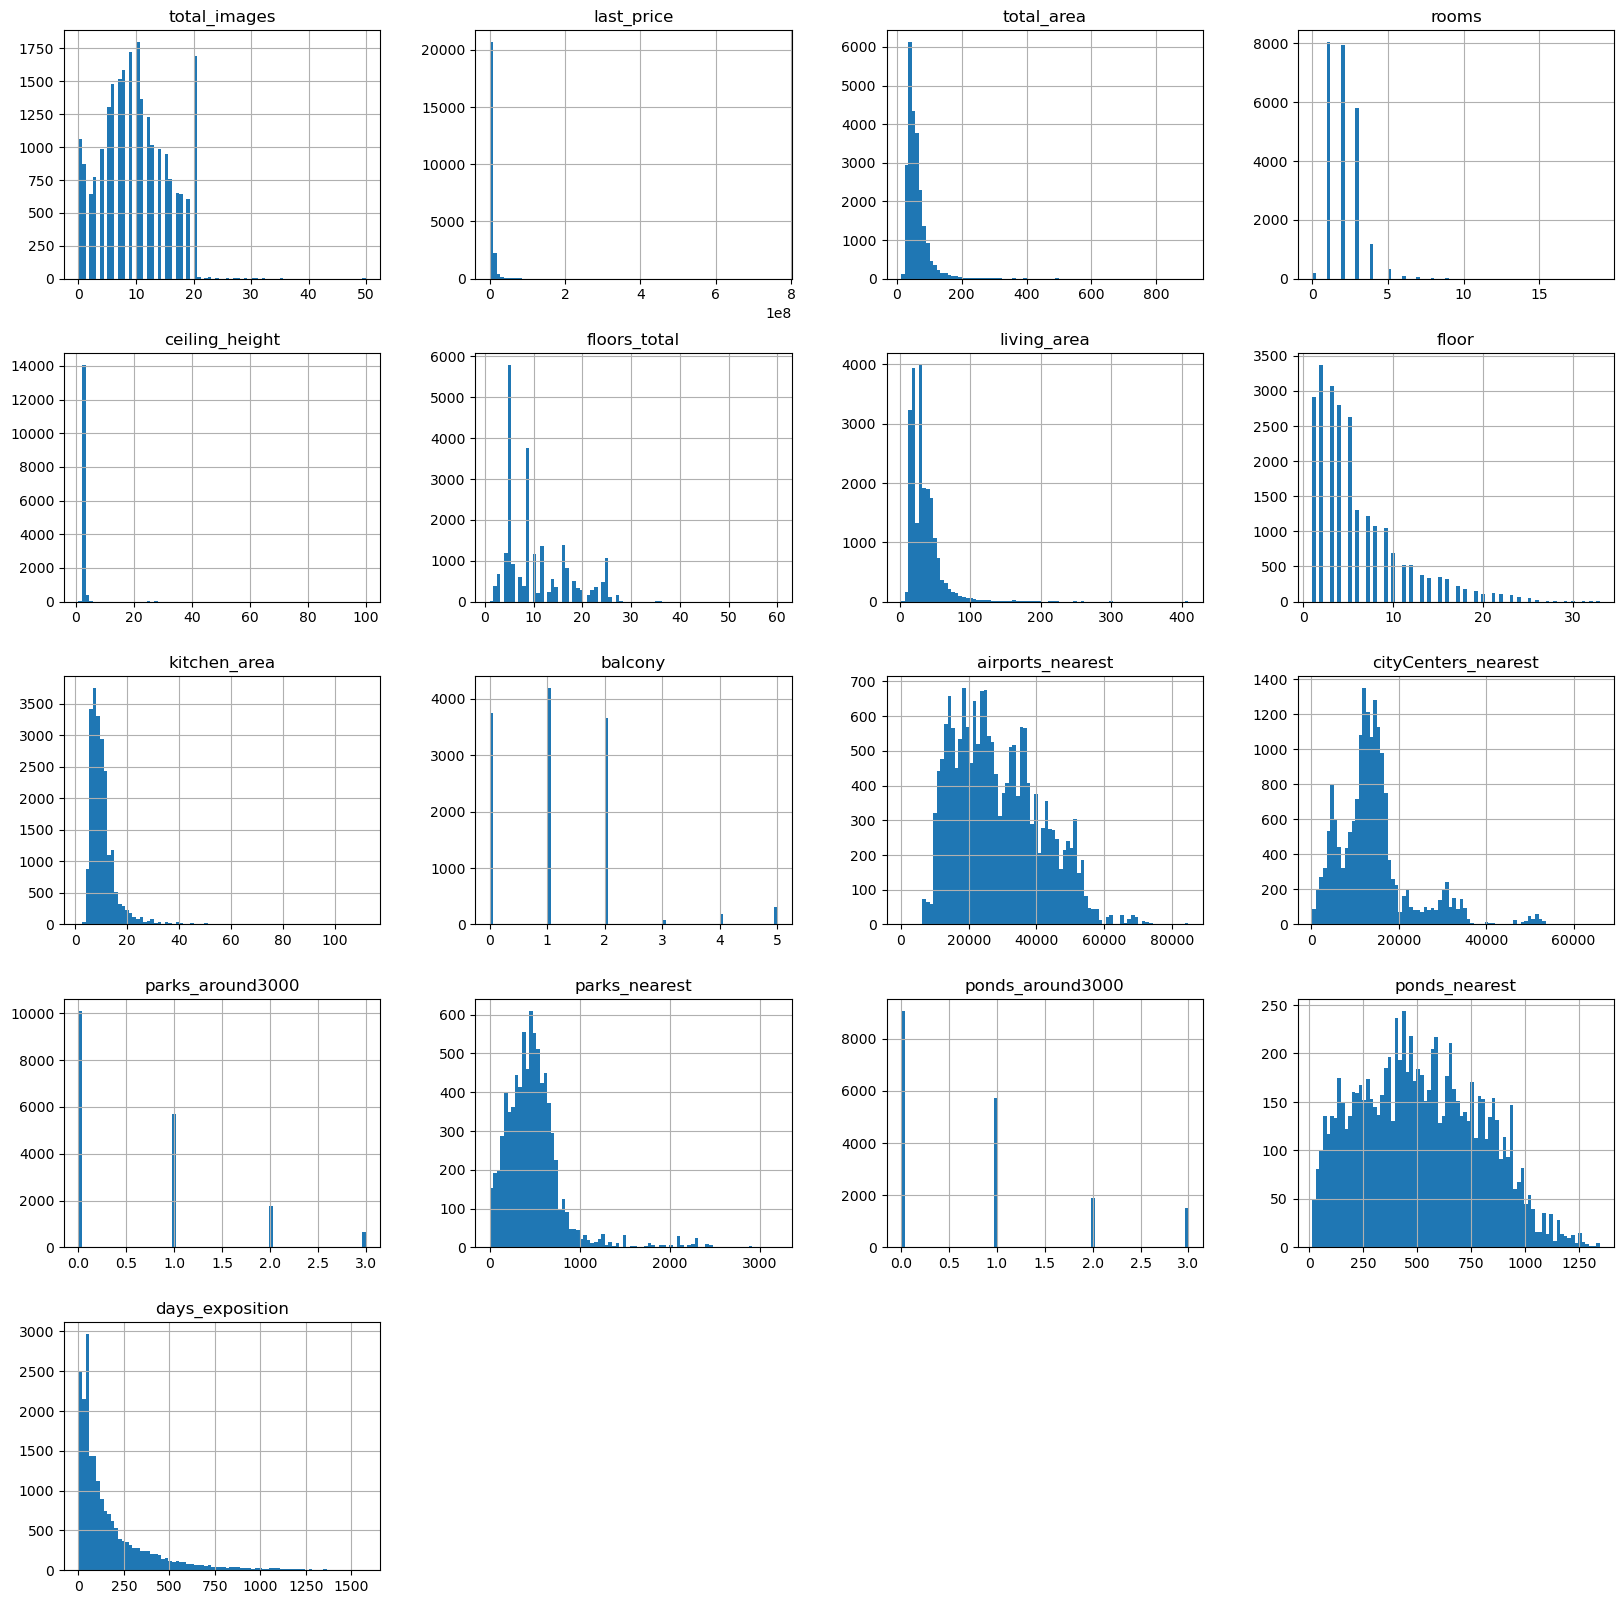

In [5]:
# построим общую гистограмму для всех числовых столбцов таблицы

df.hist(figsize=(20,20), bins=80)            
plt.show()


По общей гистограмме таблицы, можно сделать предварительные выводы. 

В большинство объявлений прикладывают фото и в среднем от 8 до 11 или 20 штук, но есть объявления и без них. 

Наибольшее количество объявлений стоимость квартир  в диапозоне от 4 млн. до 5 млн. руб. 

График общей площади квартиры показывает, что большинство квартир на продажу с площадью 30-45 кв.м. после 100 кв.м. количество объявлений резко снижается. 
График жилой площади показывает два пика. Наибольший пик приходится на полощадь от 17 до 18 кв.м., а второ пик приходится на 30 кв.м и после 50 кв.м идет снижение. Площадь кухни варьируется в основном от 5 до 10 кв.м.

Гистограмма "число комнат" показывает пик значений 1-2 комнаты, но также есть объявления с 0 числом комнат.  
Скорее всего не правильная интепритация данных по квартирам-студии или техническая ошибка.

Данные из графика "высота потолков" показывают, что высота потолков в объявлениях указана 2.4 - 2.8 м.

Что касается данных об этажности дома и квартиры, то больше всего квартир на продажу в доме с этажностью в 5 и 9 этажей, а кватиры находятся с 1 по 5 этаж.

Количество балконов указаных в объявлениях варьируется от 0 до 2, но есть квартиры с 4-мя болконами. 

Наибольшее число квартир продаются в 15-30 км от аэропорта и 15-18 км от центра города. Наименьшее число квартир - рядом с аэропортом и на растоянии более 60 км от него, и более 20 км от центра города.

Парки и водоемы рядом с продаваемыми квартирами в основном отсутствуют. Если есть парк или водоем, то расстояние до них в среднем 500 м.  

График по количеству дней размещения объявления показывает, что  объявление находится в сервисе в среднем 1.5 - 2 месяца. 



### Предобработка данных

In [6]:
# найдем процент пропусков 

pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')


,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Таблица с пропусками показывает, что в датафрейм имеется значительное количество пропусков данных. 88% отсутствует данных об аппартаментах, 66% и 62% отсутствуют данные об расстоянии до парка и водоема соответственно. 

In [7]:
#найдем уникальные значения столбца is_apartment

print(df['is_apartment'].unique())         
print()

#найдем статистические данные столбца
df['is_apartment'].describe()    


[nan False True]



count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

В столбце с данными "апартаменты" самое большое количество пропусков. Значения в данном столбце типа object и имеет два значения False или True. Из статистических данных мы видим, что всего 50 из 2775 заявлений являются апартаментами и указано значение True.  Причиной пропусков может являтся не внесения данных о квартире не являющейся апартаментами. В связи с этим  заменим значения nan на False.

In [8]:
#заменим пропуск nan на False в столбце is_apartment

df['is_apartment'] = df['is_apartment'].fillna('False')  


In [9]:
#найдем уникальные значения в столбцах parks_around3000 и ponds_around3000

print('Уникальные значения столбца parks_around3000', df['parks_around3000'].unique())

print('Уникальные значения столбца ponds_around3000', df['ponds_around3000'].unique())


Уникальные значения столбца parks_around3000 [ 1.  0.  2. nan  3.]
Уникальные значения столбца ponds_around3000 [ 2.  0.  3.  1. nan]


Скорее всего пропуски возникли в связи с отсутствием парка или водоема в радиусе 3 км, поэтому nan заменим на 0. 

In [10]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)


In [11]:
#найдем количество уникальных значений в столбце balcony

print(df['balcony'].unique())

df['balcony'].value_counts()


[nan  2.  0.  1.  5.  4.  3.]


1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Скорее всего пропуски возникли в связи с отсутствием балкона, поэтому nan заменим на 0.

In [12]:
df['balcony'] = df['balcony'].fillna(0)

Пропуски в столбцах ceiling_height, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest заполнить медианным значением в зависимости от населенного пункта.

In [13]:
print('Количество уникальных населенных пунктов', df['locality_name'].nunique())

df['locality_name'].unique()

Количество уникальных населенных пунктов 364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [14]:
df['locality_name'] = df['locality_name'].replace('посёлок', 'поселок', regex=True)

print('Количество уникальных населенных пунктов', df['locality_name'].nunique())

Количество уникальных населенных пунктов 330


In [15]:
# c помощью функции создадим новый столбец только с названием населенного пункта, чтобы убрать дублирующие названия

def select_capital_cities(city):
    if isinstance(city, str):  # Проверяем, является ли значение строкой
        words = city.split()  # Разбиваем название на слова
        capital_words = [word for word in words if word.istitle()]  # Выбираем слова, начинающиеся с заглавной буквы
        return ' '.join(capital_words)  # Объединяем выбранные слова в строку
    return None

df['locality'] = df['locality_name'].apply(select_capital_cities)

df.head(20)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,...,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,0.0,городской поселок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,Янино-1
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,...,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,Парголово
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,0.0,поселок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0,Мурино
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,Санкт-Петербург


In [16]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
locality                   49
dtype: int64

In [17]:
# создадим функцию для замены пропусков медианой в столбцах 
# ceiling_height, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest
# в зависимости от населенных пунктов. 

def fill_missing_values(df, columns):
    for column in columns:
        for locality_name in df['locality'].unique():
            median = df.loc[df['locality'] == locality_name, column].median()
            df.loc[(df[column].isna()) & (df['locality'] == locality_name), column] = median
    return df


In [18]:
# применим функцию fill_missing_values

columns_to_fill = ['ceiling_height', 'airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']

df = fill_missing_values(df, columns_to_fill)


In [19]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height           130
floors_total              86
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2278
balcony                    0
locality_name             49
airports_nearest        4837
cityCenters_nearest     4837
parks_around3000           0
parks_nearest           6032
ponds_around3000           0
ponds_nearest           4962
days_exposition         3181
locality                  49
dtype: int64

In [20]:
# остальные пропуски в столбце ceiling_height заменим медианным значением

df.loc[df['ceiling_height'].isna(),'ceiling_height'] = df['ceiling_height'].median()


Заменить все пропуски в столбцах airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest не получилось. Заменить на 0 нельзя, так как это будет расцениваться, как расположение квартиры вблизи объекта. Удалить также считаю не допустимым, так как количество пропусков большое, поэтому считаю для дальнейшего анализа nan заменить на -1. 

In [21]:
# посмотрим наличие в столбцах airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest  отрицательных значений

count_negative_values = (
    len(df[(df['airports_nearest'] < 0) |
           (df['cityCenters_nearest'] < 0) | 
           (df['parks_nearest'] < 0) | 
           (df['ponds_nearest'] < 0)])
)

count_negative_values


0

In [22]:
#заменим пропуски в столбцах airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest на  -1

def replace_missing_values_with_negative_one(column):
    column.fillna(-1, inplace=True)

columns_to_replace = ['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest']

for col_name in columns_to_replace:
    replace_missing_values_with_negative_one(df[col_name])


In [23]:
# создадим функцию для замены пропусков медианой в living_area и kitchen_area в зависимости от total_area

def fill_missing_values_2(df, columns):
    for column in columns:
        for area in df['total_area'].unique():
            median = df.loc[df['total_area'] == area, column].median()
            df.loc[(df[column].isna()) & (df['total_area'] == area), column] = median
    return df


In [24]:
# применим функцию fill_missing_values_2

columns_to_fill_2 = ['living_area', 'kitchen_area']

df = fill_missing_values_2(df, columns_to_fill_2)


In [25]:
#посмотрим от чего зависит days_exposition с помощью корреляции Пирсона

df.corr()['days_exposition'].sort_values(ascending=False)


days_exposition        1.000000
total_area             0.149675
living_area            0.146605
rooms                  0.126961
kitchen_area           0.108116
last_price             0.081146
ponds_around3000       0.066289
parks_around3000       0.055867
parks_nearest          0.022042
ceiling_height         0.018113
airports_nearest      -0.014581
studio                -0.022476
open_plan             -0.024112
ponds_nearest         -0.025033
total_images          -0.026657
balcony               -0.027834
floor                 -0.039463
cityCenters_nearest   -0.044668
floors_total          -0.052234
Name: days_exposition, dtype: float64

Из результатов корреляции Пирсона между столбцом 'days_exposition' и другими переменными видно, что наибольшее влияние на срок размещения объявления оказывают следующие переменные:
1. total_area (общая площадь квартиры) - корреляция 0.15
2. living_area (жилая площадь) - корреляция 0.15
3. rooms (количество комнат) - корреляция 0.13
4. kitchen_area (площадь кухни) - корреляция 0.11

Эти переменные имеют положительную корреляцию с сроком размещения объявления, что может указывать на то, что объявления с большей общей площадью, жилой площадью, количеством комнат и площадью кухни могут быть размещены дольше.
С другой стороны, переменные с отрицательной корреляцией, такие как cityCenters_nearest (расстояние до центра города) и floors_total (количество этажей в доме), могут указывать на то, что близкое расположение к центру города или большое количество этажей в доме могут сокращать срок размещения объявления.



In [26]:
# заменим пропуски days_exposition медианой в зависимости от 'total_area', 'living_area', 'rooms', 'kitchen_area'

median_values = df.groupby(['total_area', 'living_area', 'rooms', 'kitchen_area'])['days_exposition'].median().reset_index()

for index, row in df.iterrows():
    if pd.isnull(row['days_exposition']):
        median_val = median_values[(median_values['total_area'] == row['total_area']) | 
                                    (median_values['living_area'] == row['living_area']) | 
                                    (median_values['rooms'] == row['rooms'])|
                                    (median_values['kitchen_area'] == row['kitchen_area'])]['days_exposition'].values
        if len(median_val) > 0:
            df.at[index, 'days_exposition'] = median_val[0]


In [27]:
# удалим пропуски в столбцах 'floors_total', 'locality_name', т.к. нет возможности заменить на данные
# и оставшиеся пропуски в столбцах living_area и kitchen_area, days_exposition

columns_to_check = ['floors_total', 'locality_name', 'living_area', 'kitchen_area', 'days_exposition']

df.dropna(subset=columns_to_check, inplace=True)


In [28]:
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
locality                0
dtype: int64

In [29]:
df.shape

(23098, 23)

In [30]:
df.duplicated().sum()

0

Для удобства расчетов изменим тип данных float на int седующих столбцах:
- last_price - для цены квартиры нет нужды указывать десятичные числа;
- floors_total, balcony, ponds_around3000, parks_around3000 - данные в этих столбцах могут быть только целые числа;
- days_exposition - указывать неполные дни размещения объявления не целесообразно;
 
С object на datetime изменим в столбце first_day_exposition - для удобства анализа изменим формат даты.
 

In [31]:
#заменим тип данных в столбцах с float на int

def convert_columns_to_int(df, columns):
    for col in columns:
        df[col] = df[col].astype('int')
    return df

columns_to_convert = (['last_price', 
                       'floors_total',
                       'balcony', 
                       'parks_around3000',
                       'ponds_around3000', 
                       'days_exposition']
                     )

df = convert_columns_to_int(df, columns_to_convert)


#заменим тип данных с object на datetime

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')


Обработаем аномалии и выбросы в данных.

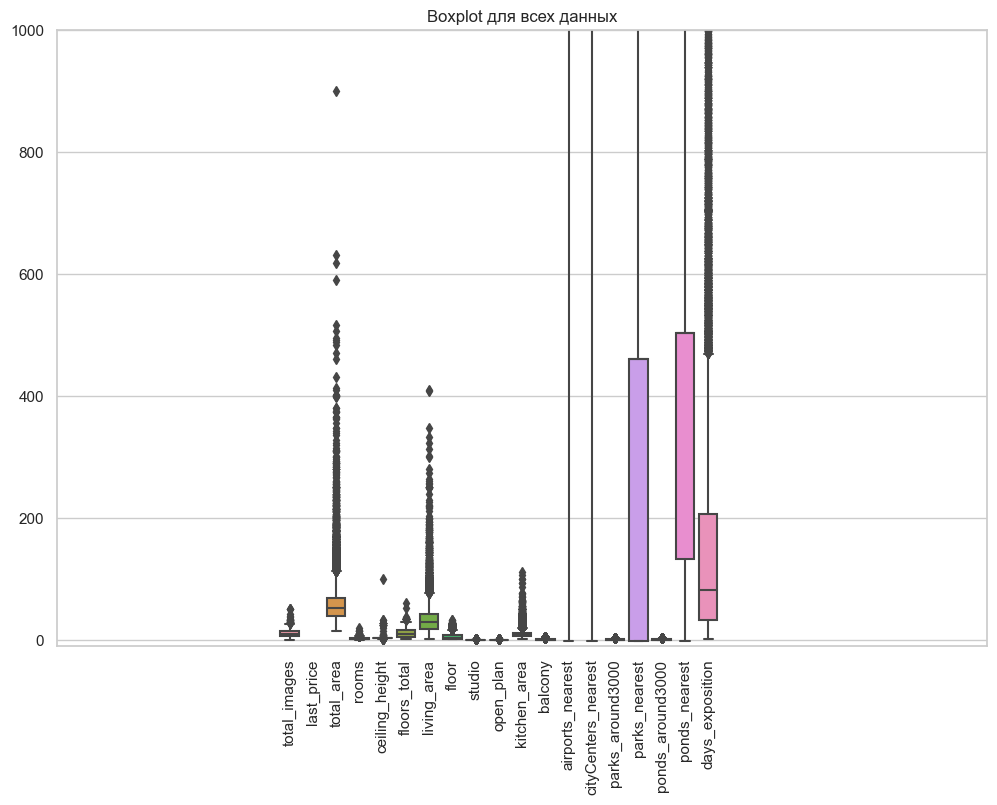

In [32]:
# cоздадим boxplot для всех данных

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))  
sns.boxplot(data=df, showfliers=True)
plt.ylim(-10, 1000)
plt.xlim(-10, 30)
plt.xticks(rotation=90)  
plt.title('Boxplot для всех данных')  
plt.show()


In [33]:
df.describe().round(0)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23098.0,23098.0,23098.0,23098.0,23098.0,23098.0,23098.0,23098.0,23098.0,23098.0,23098.0,23098.0,23098.0,23098.0,23098.0,23098.0,23098.0
mean,10.0,6468670.0,60.0,2.0,3.0,11.0,34.0,6.0,10.0,1.0,23465.0,11505.0,0.0,355.0,1.0,395.0,165.0
std,6.0,10670840.0,34.0,1.0,1.0,7.0,22.0,5.0,6.0,1.0,16661.0,9642.0,1.0,290.0,1.0,274.0,213.0
min,0.0,12190.0,14.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,1.0
25%,6.0,3429250.0,40.0,1.0,3.0,5.0,19.0,2.0,7.0,0.0,11925.0,3865.0,0.0,-1.0,0.0,133.0,32.0
50%,9.0,4600000.0,52.0,2.0,3.0,9.0,30.0,4.0,9.0,0.0,23104.0,11754.0,0.0,460.0,0.0,503.0,82.0
75%,14.0,6750000.0,69.0,3.0,3.0,16.0,42.0,8.0,12.0,1.0,35742.0,15719.0,1.0,460.0,1.0,503.0,207.0
max,50.0,763000000.0,900.0,19.0,100.0,60.0,410.0,33.0,112.0,5.0,84869.0,65968.0,3.0,3190.0,3.0,1344.0,1580.0


Отмечу только те столбцы, где мне кажется стоит разобраться. 
1. В столбце цена минимальное значение равно 12190, что противоречит логике. 
2. Аномальное максимальное значение в столбце высота потолков, которая равняется 100. 
3. Аномальное максимальное значение в столбце этажность дома. 

In [34]:
# посмотрим на данные где цена стоит 12190

df.query('last_price == 12190')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,503.0,8,Санкт-Петербург


In [35]:
# найдем среднюю стоимость недвижимости с общей площадью 109 кв.м

df.query('total_area == 109')['last_price'].mean()


15074008.636363637

In [36]:
#заменим анамальное значение в столбце last_price

df['last_price'] = df['last_price'].replace(12190, 12190000, regex=True)


In [37]:
# посмотрим на данные где этажность дома равна 60

df.query('floors_total == 60')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality
2253,12,3800000,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,0,Кронштадт,67763.0,49488.0,2,342.0,3,614.0,166,Кронштадт


In [38]:
#заменим аномальное значение в столбце floors_total

df['floors_total'] = df['floors_total'].replace(60, 6, regex=True)


In [39]:
# найдем аномальные значения в столбце ceiling_height, считаю, что высота потолка выше 10м - нереалистично

height = df.query('ceiling_height > 9.9')

height.ceiling_height.unique()


array([ 25. ,  27. ,  32. ,  24. ,  26. ,  14. ,  20. ,  22.6,  27.5,
        10.3, 100. ])

In [40]:
# посмотрим объявления с высотой потолков выше 10м

df.query('ceiling_height > 9.9')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality
355,17,3600000,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,2,Гатчина,-1.0,-1.0,0,-1.0,0,-1.0,259,Гатчина
2158,15,1500000,42.0,2017-12-23,2,27.0,2,29.0,2,False,...,0,деревня Мины,-1.0,-1.0,0,-1.0,0,-1.0,16,Мины
3148,14,2900000,75.0,2018-11-12,3,32.0,3,53.0,2,False,...,0,Волхов,-1.0,-1.0,0,-1.0,0,-1.0,20,Волхов
4643,0,4300000,45.0,2018-02-01,2,25.0,9,30.0,2,False,...,1,Санкт-Петербург,12016.0,13256.0,1,658.0,1,331.0,181,Санкт-Петербург
4876,7,3000000,25.0,2017-09-27,0,27.0,25,17.0,17,False,...,2,поселок Мурино,51553.0,21888.0,0,-1.0,0,133.0,28,Мурино
5076,0,3850000,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,0,Санкт-Петербург,29686.0,8389.0,3,397.0,1,578.0,7,Санкт-Петербург
5246,0,2500000,54.0,2017-10-13,2,27.0,5,30.0,3,False,...,2,деревня Мины,-1.0,-1.0,0,-1.0,0,-1.0,540,Мины
5669,4,4400000,50.0,2017-08-08,2,26.0,9,21.3,3,False,...,2,Санкт-Петербург,28981.0,10912.0,1,305.0,0,503.0,267,Санкт-Петербург
5807,17,8150000,80.0,2019-01-09,2,27.0,36,41.0,13,False,...,5,Санкт-Петербург,18732.0,20444.0,0,460.0,3,80.0,38,Санкт-Петербург
6246,6,3300000,44.4,2019-03-25,2,25.0,5,31.3,5,False,...,0,Кронштадт,68923.0,50649.0,1,417.0,2,73.0,16,Кронштадт


Видим, что высота потолка выше 10м в указано в типичных объявлениях, поэтому скорее всего это опечатка, поэтому значения разделим на 10, если высота потолка выше 14м. А объявления с 14 и 100 метрами посмотрим отдельно. 

In [41]:
# разделим значения потолков больше 14 м на 10

for height in df.ceiling_height:
    if height > 14:
        df.loc[df.ceiling_height == height, 'ceiling_height'] = height // 10


In [42]:
df.query('ceiling_height > 9.9')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality
15061,19,5600000,56.4,2018-05-11,2,14.0,14,32.4,5,False,...,2,Санкт-Петербург,14814.0,13610.0,0,460.0,0,503.0,315,Санкт-Петербург
22309,20,5300000,45.0,2017-09-30,1,10.3,16,15.5,15,False,...,0,Санкт-Петербург,36353.0,11936.0,2,440.0,2,450.0,136,Санкт-Петербург
22869,0,15000000,25.0,2018-07-25,1,10.0,5,14.0,5,True,...,5,Санкт-Петербург,34963.0,8283.0,1,223.0,3,30.0,19,Санкт-Петербург


По моему мнению в объявлении с указанием высоты потолка 14м - это ошибка, так как маловероятно, что квартира находящаяся на 5 этаже 14-ти этажного дома имеет указанную высоту. Изменим на 2.4м.
Тоже самое и в объявлениис указанной высотой потолка 10.3м, рационально изменить на 2.3м.

А вот объявление с высотой потолка в 10м, я оставлю без изменения, так как указана высокая цена, и квартира находится на последнем этаже, но площадь маленькая. 



In [43]:
df.loc[df.ceiling_height == 14.0, 'ceiling_height'] = 2.4

df.loc[df.ceiling_height == 10.3, 'ceiling_height'] = 2.3

В разделе предобработка данных избавились от пропусков, заменили тип данных столбцов с float на int и c object на datetime, где это было необходимо.  Обработали явные аномальные значения. 

### Исследовательский анализ

Для исследовательского анализа рассчитаем и добавим новые столбцы5

- цена одного квадратного метра,
- день недели публикации,
- месяц и год публикации,
- тип этажа квартиры,
- расстояние до центра города в км.


In [44]:
#создадим новый столбец "цена одного квадратного метра"

df['price_sq_m'] = round(df['last_price'] / df['total_area'],2)  


In [45]:
#создадим новый столбец "день недели публикации"

df['weekday'] = df['first_day_exposition'].dt.day_name()   


In [46]:
#создадим новый столбец "месяц публикации"

df['month'] = df['first_day_exposition'].dt.month_name()    

#создадим новый столбец "месяц и год публикации"

df['month_year'] = df['first_day_exposition'].dt.strftime('%m-%Y')


In [47]:
#создадим новый столбец расстояние до центра города в км.
    
df['centre_km'] = df['cityCenters_nearest'] / 1000

df['centre_km'] = df['centre_km'].apply(np.ceil)

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality,price_sq_m,weekday,month,month_year,centre_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,54,Санкт-Петербург,120370.37,Thursday,March,03-2019,17.0
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,-1.0,0,584.5,81,Шушары,82920.79,Tuesday,December,12-2018,19.0
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,90.0,2,574.0,558,Санкт-Петербург,92785.71,Thursday,August,08-2015,14.0
3,0,64900000,159.0,2015-07-24,3,2.70,14,95.0,9,False,...,84.0,3,234.0,424,Санкт-Петербург,408176.10,Friday,July,07-2015,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121,Санкт-Петербург,100000.00,Tuesday,June,06-2018,9.0


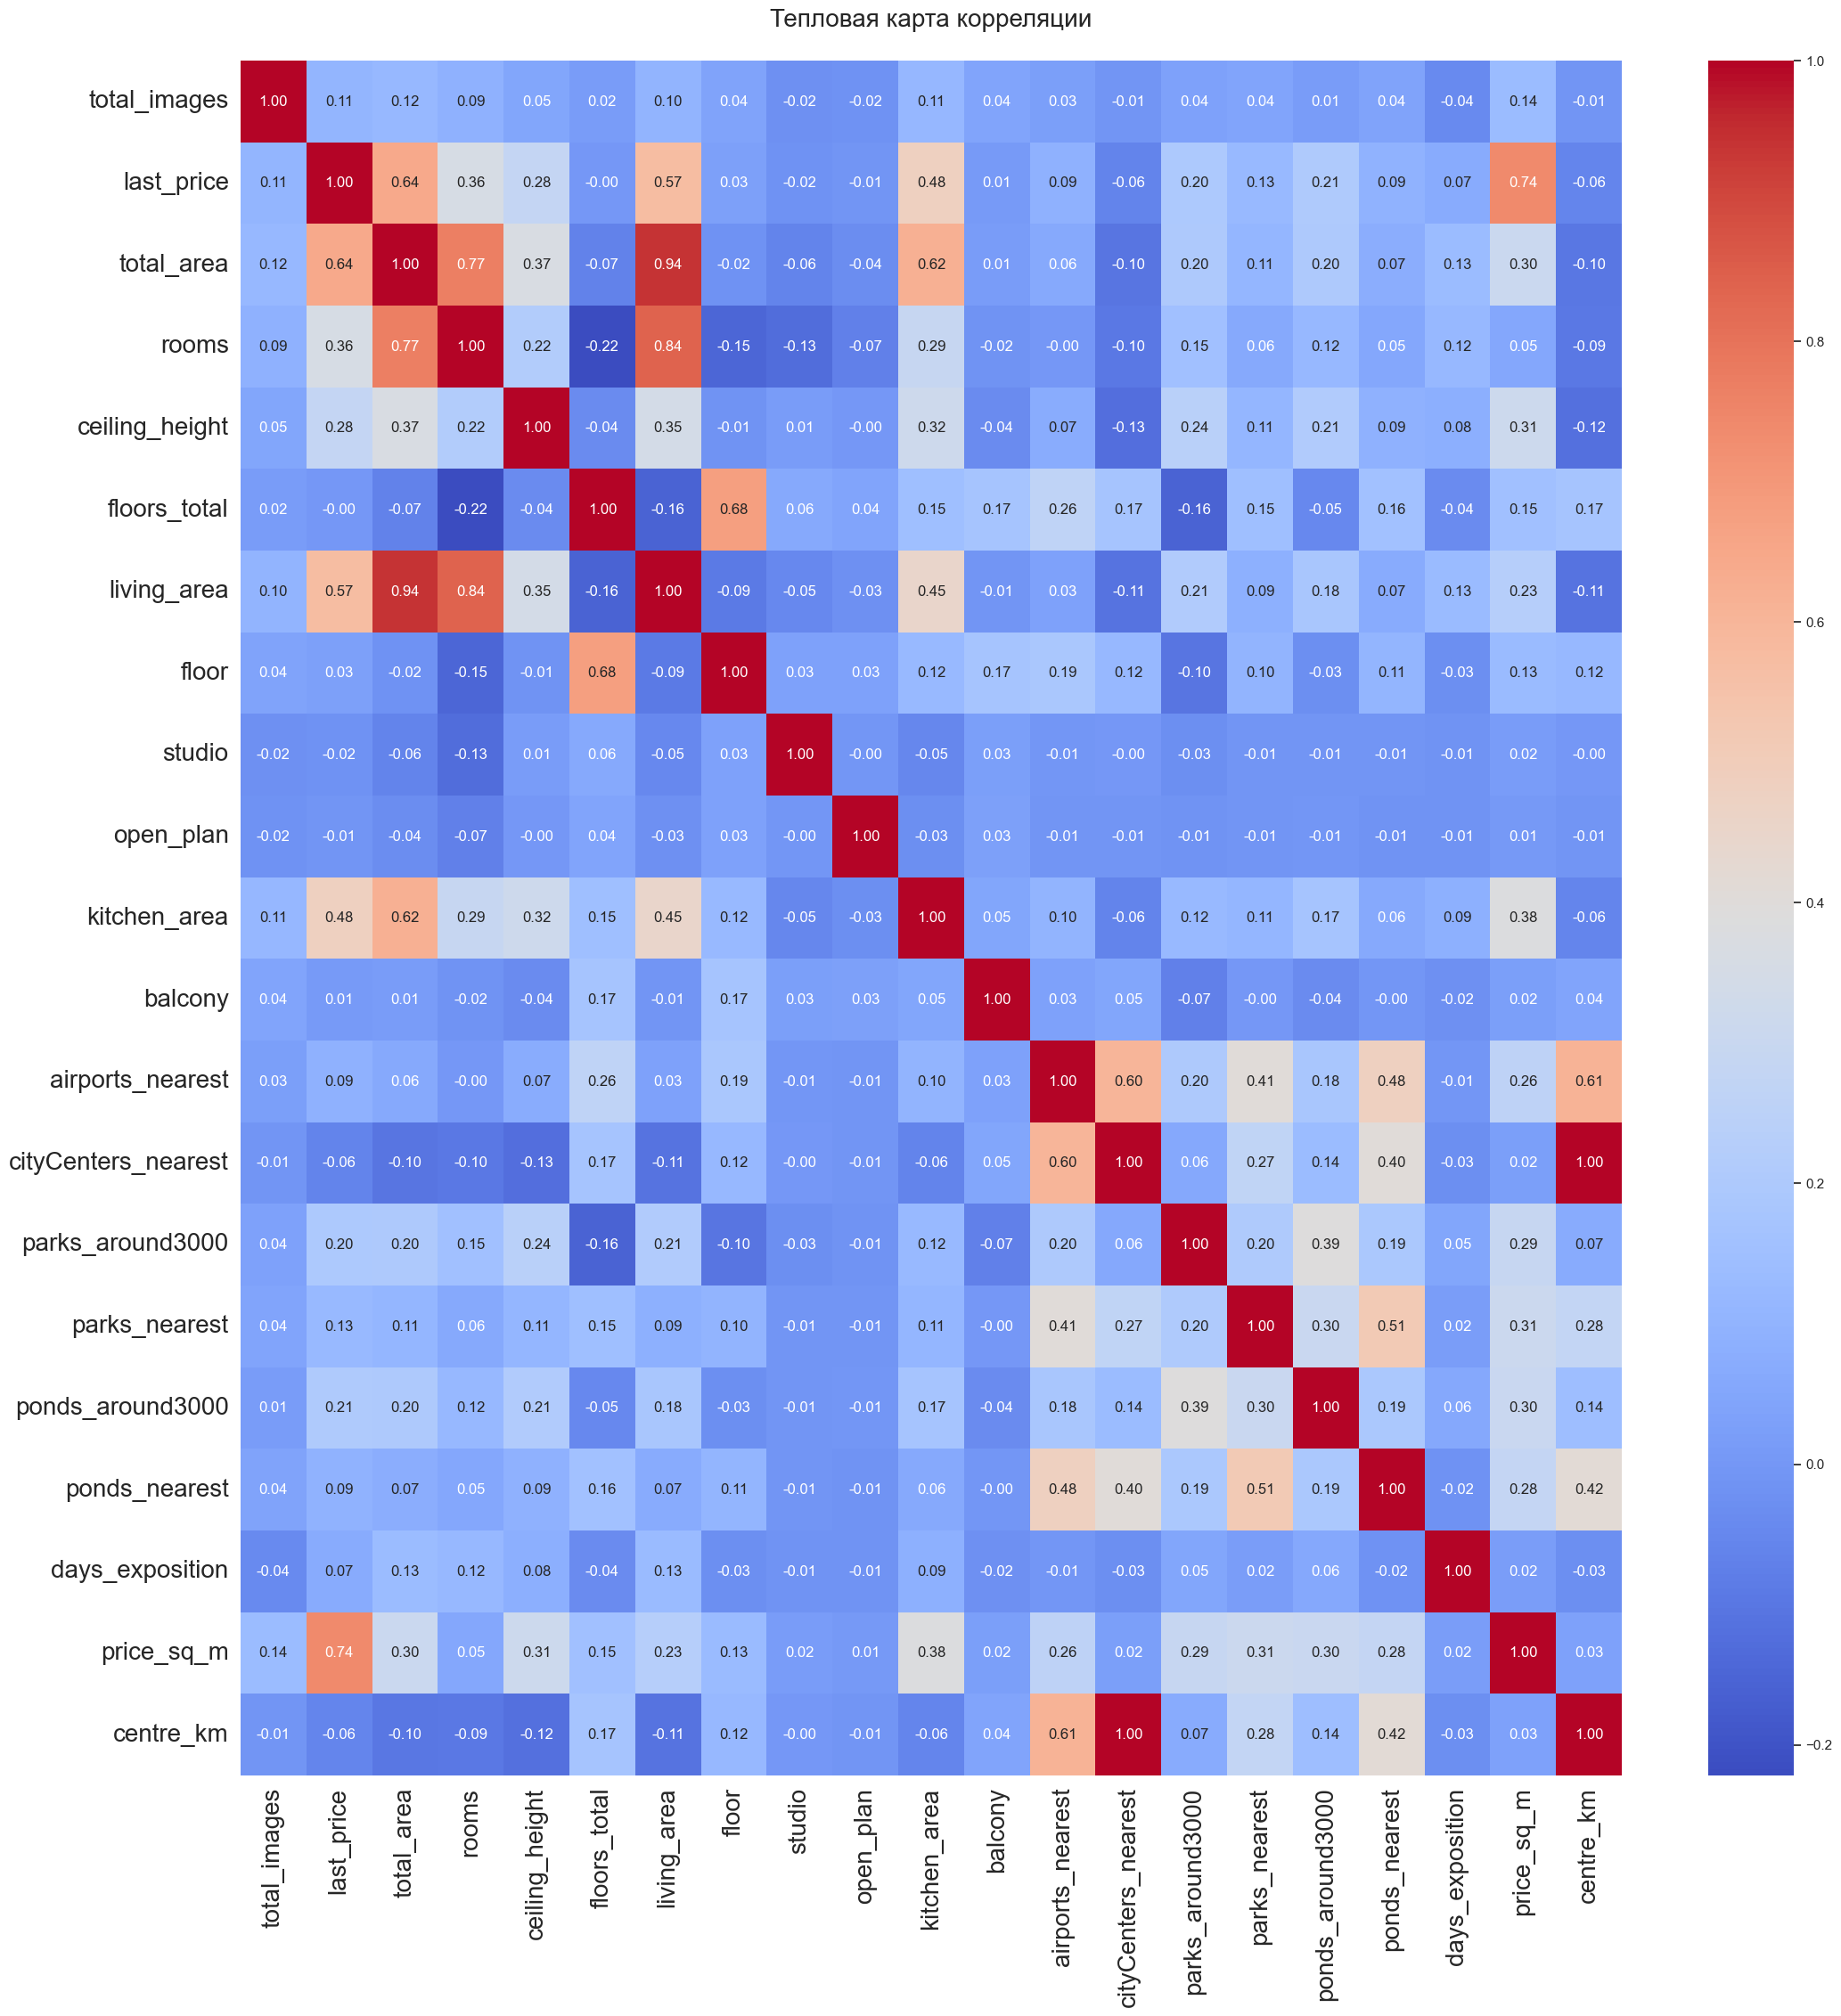

In [48]:
# построим корреляционный график и 
# посмотрим взаимосвязи между переменнными

plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Тепловая карта корреляции\n', fontsize=20)
plt.show()


1. **Сильная положительная корреляция:**
- Цена на жилье (last_price) сильно положительно коррелирует с общей площадью квартиры (total_area), жилой площадью (living_area) и площадью кухни. Это ожидаемо, так как обычно более просторные квартиры имеют более высокую цену.
- Общая площадь квартиры (total_area) также сильно положительно коррелирует с жилой площадью (living_area) и количеством комнат (rooms), что также логично.

2. **Средняя взаимосвязь:** 
- Цены (last_price) и числа комнат (rooms), это значит, что с ростом площади и количества комнат растет цена квартиры. 
- Цена (last_price) и высота потолка (ceiling_height) наблюдаем слабую корреляцию.

3. **Слабая корреляция:**
- Количество изображений квартиры (total_images) имеет слабую положительную корреляцию с ценой на жилье (last_price).
- Этаж квартиры (floor) и наличие парка или водоема в пределах 3 км слабо коррелирует с ценой на жилье (last_price).

In [49]:
# посмотрим на разброс количества объявлений по населенным пунктам

df_grouped = df.groupby('locality', as_index=False).size().sort_values(by='size', ascending=False).head(15)

df_grouped


,locality,size
221,Санкт-Петербург,15350
145,Мурино,544
104,Кудрово,449
295,Шушары,437
34,Всеволожск,390
200,Пушкин,361
88,Колпино,334
168,Парголово,323
42,Гатчина,305
35,Выборг,236


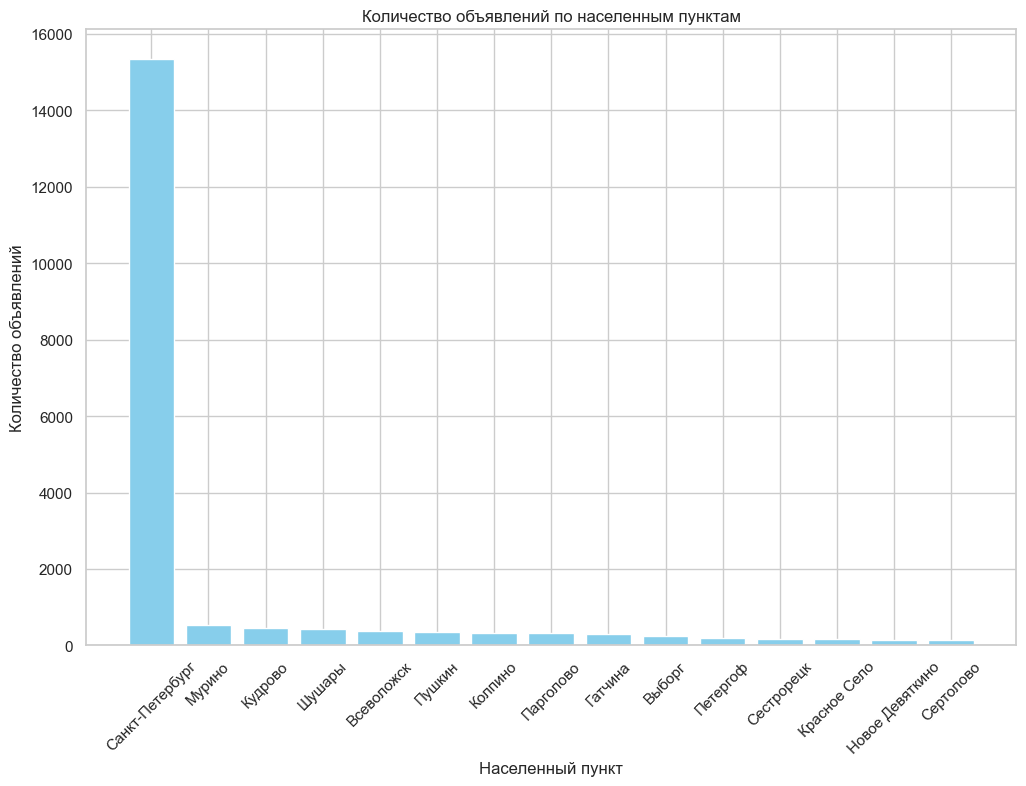

In [50]:
# построим график количество объявлений по населенным пунктам

plt.figure(figsize=(12, 8))
plt.bar(df_grouped['locality'], df_grouped['size'], color='skyblue')
plt.xlabel('Населенный пункт')
plt.ylabel('Количество объявлений')
plt.title('Количество объявлений по населенным пунктам')
plt.xticks(rotation=45)
plt.show()


In [51]:
# проведем статистический анализ объявлений в г. Санкт-Петербург

pd.options.display.float_format = '{:,.2f}'.format

df.query('locality == "Санкт-Петербург"').describe().round(2)


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,centre_km
count,"15,350.00","15,350.00","15,350.00","15,350.00","15,350.00","15,350.00","15,350.00","15,350.00","15,350.00","15,350.00","15,350.00","15,350.00","15,350.00","15,350.00","15,350.00","15,350.00","15,350.00","15,350.00","15,350.00"
mean,10.21,"7,960,341.38",64.19,2.16,2.74,11.39,36.88,6.22,11.02,0.58,"28,029.51","11,598.54",0.62,477.52,0.76,512.38,167.04,"114,660.54",12.10
std,5.75,"12,743,013.23",38.67,1.14,0.26,6.36,24.40,4.88,6.41,0.97,"11,530.24","4,801.74",0.79,234.43,0.92,199.50,217.47,"52,415.37",4.80
min,0.00,"1,190,000.00",14.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00,"15,345.27",1.00
25%,6.00,"4,200,000.00",42.00,1.00,2.60,5.00,19.90,3.00,7.20,0.00,"18,582.75","8,370.00",0.00,460.00,0.00,503.00,30.00,"90,909.09",9.00
50%,10.00,"5,500,000.00",54.90,2.00,2.70,9.00,31.20,5.00,9.60,0.00,"26,757.50","12,244.50",0.00,460.00,1.00,503.00,84.00,"104,694.18",13.00
75%,14.00,"8,090,388.50",74.10,3.00,2.75,16.00,44.00,8.00,12.30,1.00,"36,553.00","14,933.00",1.00,460.00,1.00,510.00,208.00,"124,166.67",15.00
max,50.00,"763,000,000.00",900.00,19.00,10.00,52.00,409.70,33.00,112.00,5.00,"54,784.00","29,493.00",3.00,"3,190.00",3.00,"1,337.00","1,572.00","1,907,500.00",30.00


In [52]:
# проведем статистический анализ объявлений в пригороде

df.query('locality != "Санкт-Петербург"').describe().round(2)


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,centre_km
count,"7,748.00","7,748.00","7,748.00","7,748.00","7,748.00","7,748.00","7,748.00","7,748.00","7,748.00","7,748.00","7,748.00","7,748.00","7,748.00","7,748.00","7,748.00","7,748.00","7,748.00","7,748.00","7,748.00"
mean,9.24,"3,515,007.41",51.54,1.87,2.63,9.18,29.35,5.16,9.26,0.61,"14,422.82","11,318.24",0.16,112.25,0.24,161.60,160.94,"68,615.62",11.49
std,5.50,"2,149,254.53",20.65,0.88,0.19,6.74,13.72,4.75,3.94,0.94,"21,002.75","15,212.55",0.55,230.29,0.67,252.59,204.85,"25,870.49",15.43
min,0.00,"430,000.00",17.00,0.00,1.20,1.00,2.00,1.00,2.30,0.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,3.00,"7,962.96",-0.00
25%,5.00,"2,350,000.00",37.00,1.00,2.50,5.00,18.00,2.00,6.60,0.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,35.00,"51,594.61",-0.00
50%,9.00,"3,190,000.00",47.00,2.00,2.60,5.00,28.00,4.00,8.70,0.00,-1.00,-1.00,0.00,-1.00,0.00,-1.00,79.00,"68,520.50",-0.00
75%,13.00,"4,200,000.00",60.50,2.00,2.70,12.00,37.00,6.00,10.60,1.00,"25,623.25","23,688.00",0.00,-1.00,0.00,297.00,206.00,"84,615.38",24.00
max,39.00,"42,000,000.00",380.00,8.00,8.00,29.00,239.40,27.00,64.00,5.00,"84,869.00","65,968.00",3.00,"2,131.00",3.00,"1,344.00","1,580.00","640,422.35",66.00


Наибольшее количество объявлений принадлежит г.Санкт-Петербургу и составляет 66.5% всех объявлений. Сравним статистические показатели объявлений в городе и в пригороде:
1. Средняя цена в городе выше на 4.5 млн. по сравнению с пригородом.
2. Средняя цена одного кв. м. в городе на 46 тыс. выше, чем в пригороде.
3. Средняя площадь в городе выше и составляет 64 кв.м. по сравнению с пригородом  - 51.5 кв.м.

Получается, что цена в пригороде меньше на 55.8%, а площадь всего на 19.5%.

In [53]:
# посмотрим на среднюю цену в зависиомти от количества комнат в Санкт-Петербурге

result =df.query('locality == "Санкт-Петербург"')\
  .groupby('rooms', as_index=False)\
  .agg({'total_area': 'mean','last_price': 'mean', 'price_sq_m': 'mean'}).round(2)\
  .sort_values(by='rooms')

result.columns = ['Количество комнат', 'Средняя площадь', 'Средняя цена', 'Средняя цена за кв.м.']

print('Сводная таблица по недвижимости в Санкт-Петербурге')
result


Сводная таблица по недвижимости в Санкт-Петербурге


,Количество комнат,Средняя площадь,Средняя цена,Средняя цена за кв.м.
0,0,30.16,"3,724,142.86","123,089.29"
1,1,38.33,"4,484,654.31","115,879.80"
2,2,57.44,"6,752,154.06","112,725.03"
3,3,80.17,"9,615,816.24","111,257.57"
4,4,109.56,"14,718,643.85","120,100.80"
5,5,163.94,"24,842,741.01","132,578.21"
6,6,198.66,"31,830,115.05","145,361.39"
7,7,260.31,"52,913,846.15","169,735.20"
8,8,244.70,"54,179,000.00","203,374.96"
9,9,304.97,"35,674,128.57","109,305.33"


In [54]:
# посмотрим на среднюю цену в зависиомти от количества комнат в пригороде Санкт-Петербурге


result2 =df.query('locality != "Санкт-Петербург"')\
  .groupby('rooms', as_index=False)\
  .agg({'total_area': 'mean','last_price': 'mean', 'price_sq_m': 'mean'}).round(2).sort_values(by='rooms')

result2.columns = ['Количество комнат', 'Средняя площадь', 'Средняя цена', 'Средняя цена за кв.м.']

print('Сводная таблица по недвижимости в пригороде Санкт-Петербурга')
result2

Сводная таблица по недвижимости в пригороде Санкт-Петербурга


,Количество комнат,Средняя площадь,Средняя цена,Средняя цена за кв.м.
0,0,26.19,"2,290,436.36","88,787.99"
1,1,36.68,"2,809,752.45","76,538.72"
2,2,52.73,"3,461,390.89","64,123.34"
3,3,71.01,"4,502,037.77","61,872.96"
4,4,92.71,"6,183,779.24","61,886.16"
5,5,116.93,"6,364,633.33","52,637.05"
6,6,215.95,"16,399,200.00","75,807.85"
7,7,374.00,"42,000,000.00","112,299.47"
8,8,347.50,"36,900,000.00","106,187.05"


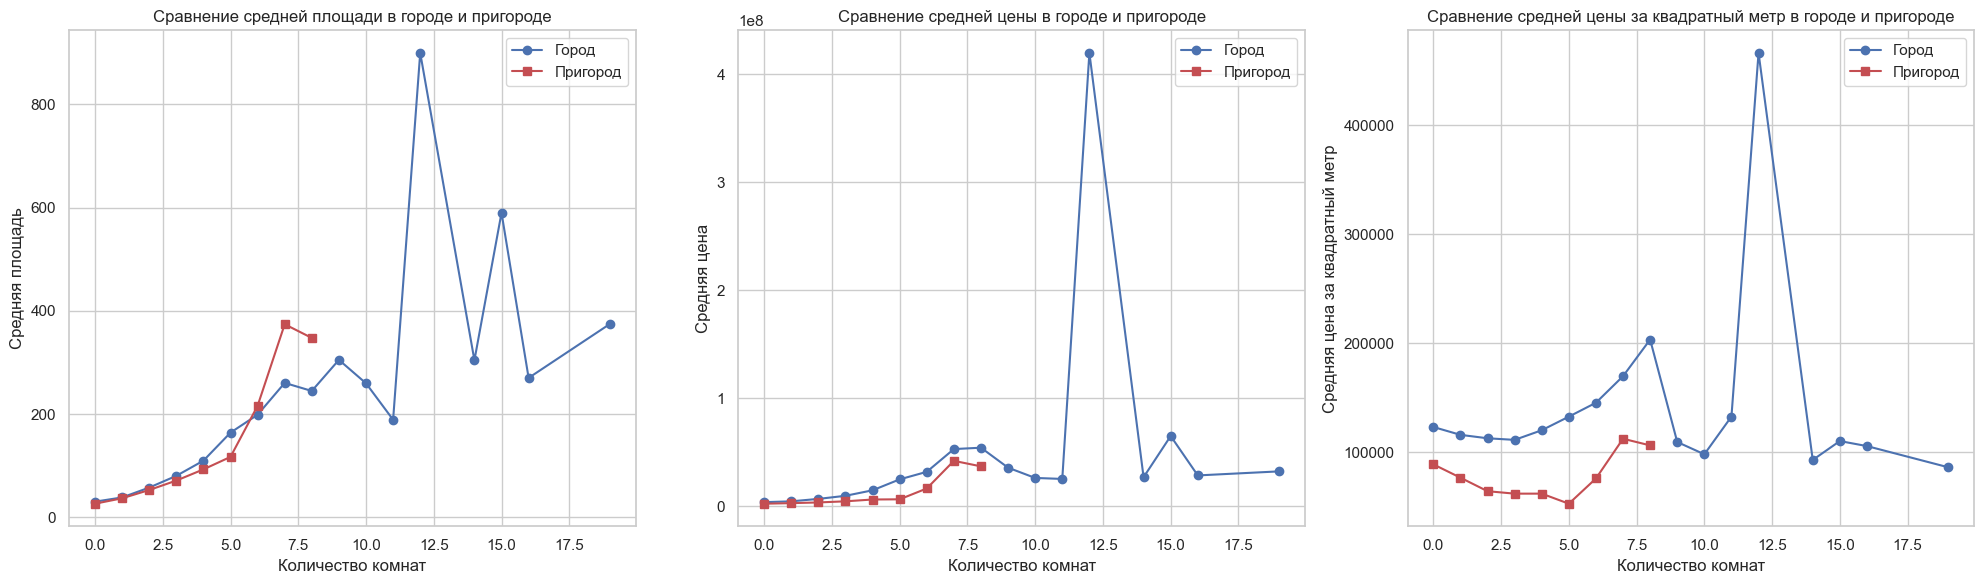

In [55]:
# построим графики сводных таблиц

plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.plot(result['Количество комнат'], result['Средняя площадь'], marker='o', color='b', label='Город')
plt.plot(result2['Количество комнат'], result2['Средняя площадь'], marker='s', color='r', label='Пригород')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя площадь')
plt.title('Сравнение средней площади в городе и пригороде')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(result['Количество комнат'], result['Средняя цена'], marker='o', color='b', label='Город')
plt.plot(result2['Количество комнат'], result2['Средняя цена'], marker='s', color='r', label='Пригород')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена')
plt.title('Сравнение средней цены в городе и пригороде')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(result['Количество комнат'], result['Средняя цена за кв.м.'], marker='o', color='b', label='Город')
plt.plot(result2['Количество комнат'], result2['Средняя цена за кв.м.'], marker='s', color='r', label='Пригород')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена за квадратный метр')
plt.title('Сравнение средней цены за квадратный метр в городе и пригороде')
plt.legend()

plt.tight_layout()
plt.show()


Средняя площадь  с 0 до 4 комнат в обоих случаях практически одинаковая. В пригороде средняя площадь квартир с 6 комнатами и более значительно выше, чем в городе. Это может быть связано с тем, что в пригороде чаще встречаются просторные дома и коттеджи. В целом по площади квартиры идентичны, если не брать в анализ две квартиры с 590 и 900 кв.м., которые находятся в г.Санкт-Петербург. 

В Санкт-Петербурге средняя цена недвижимости выше, чем в пригороде. Резкое увеличения средней цены в городе начинается с 3-х комнатных квартир. В пригороде резкое увеличение цены начинается с 6-ти комнатных квартир. 

Самая низкая стоимость одного квадратного метра в городе составляет 86,091 руб. при покупке 19-ти комнатной квартиры площадью 374 кв.м. А в пригороде 52,637 руб. при покупке 5-ти комнатной квартиры площадью 117 кв.м.

In [56]:
# найдем объявление с самой низкой стоимостью за один кв.м. в пригороде

df.loc[df['price_sq_m'].idxmin()]


total_images                                5
last_price                             430000
total_area                              54.00
first_day_exposition      2018-06-26 00:00:00
rooms                                       2
ceiling_height                           2.70
floors_total                                3
living_area                             31.00
floor                                       3
is_apartment                            False
studio                                  False
open_plan                               False
kitchen_area                             9.00
balcony                                     0
locality_name           поселок станции Свирь
airports_nearest                        -1.00
cityCenters_nearest                     -1.00
parks_around3000                            0
parks_nearest                           -1.00
ponds_around3000                            0
ponds_nearest                           -1.00
days_exposition                   

Если верить интернету, то на станции Свирь находится одно жилое здание — 27-квартирный трёхэтажный кирпичный дом, построенный в 1989 году. Поэтому там самая низкая стоимость квартиры. 

In [57]:
# найдем объявление с самой высокой стоимостью одного кв.м. вне города Санкт-Петербург

df.query('locality != "Санкт-Петербург"')\
  .agg({'price_sq_m': 'max'})


price_sq_m   640,422.35
dtype: float64

In [58]:
df[df['price_sq_m'] == 640422.35]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality,price_sq_m,weekday,month,month_year,centre_km
21238,1,24412900,38.12,2018-06-27,1,2.70,10,16.83,4,False,...,-1.00,0,-1.00,44,Всеволожск,"640,422.35",Wednesday,June,06-2018,-0.00


Самая высокая стоимость за 1 кв.м (640,422.35 руб.) в городе Всеволожск, при чем площадь квартиры всего 38.12 кв.м. 

Найдем на сколько изменяется цена квартиры в зависимости от удаленности от центра г.Санкт-Петербург. 

In [59]:
# найдем разницу в цене в зависимости от удаленности от центара г. Санкт-Петербург

price_1km = df.query('centre_km > 0')\
              .groupby(['centre_km', 'locality'], as_index=False)\
              .agg({'last_price': 'mean'})

price_1km = price_1km.sort_values('centre_km')

price_1km['price_change_per_km'] = price_1km['last_price'].diff()

price_1km.head(30)


,centre_km,locality,last_price,price_change_per_km
0,1.00,Санкт-Петербург,"23,689,872.09",NaN
1,2.00,Санкт-Петербург,"18,832,616.45","-4,857,255.65"
2,3.00,Санкт-Петербург,"16,325,183.38","-2,507,433.07"
3,4.00,Санкт-Петербург,"13,202,161.90","-3,123,021.47"
4,5.00,Санкт-Петербург,"13,293,167.81","91,005.91"
5,6.00,Санкт-Петербург,"14,827,808.58","1,534,640.77"
6,7.00,Санкт-Петербург,"13,703,818.05","-1,123,990.53"
7,8.00,Санкт-Петербург,"12,742,811.94","-961,006.11"
8,9.00,Санкт-Петербург,"8,354,538.68","-4,388,273.26"
9,10.00,Санкт-Петербург,"6,446,805.73","-1,907,732.95"


In [60]:
price_1km.tail(30)

,centre_km,locality,last_price,price_change_per_km
124,42.00,Красное Село,"2,868,625.00","-1,092,803.57"
126,43.00,Сестрорецк,"7,045,000.00","4,176,375.00"
125,43.00,Репино,"28,000,000.00","20,955,000.00"
127,44.00,Репино,"4,500,000.00","-23,500,000.00"
128,46.00,Репино,"5,100,000.00","600,000.00"
129,47.00,Кронштадт,"4,002,333.33","-1,097,666.67"
130,48.00,Кронштадт,"3,627,857.14","-374,476.19"
131,48.00,Петергоф,"4,330,000.00","702,142.86"
132,49.00,Кронштадт,"3,325,000.00","-1,005,000.00"
133,49.00,Петергоф,"5,044,928.57","1,719,928.57"


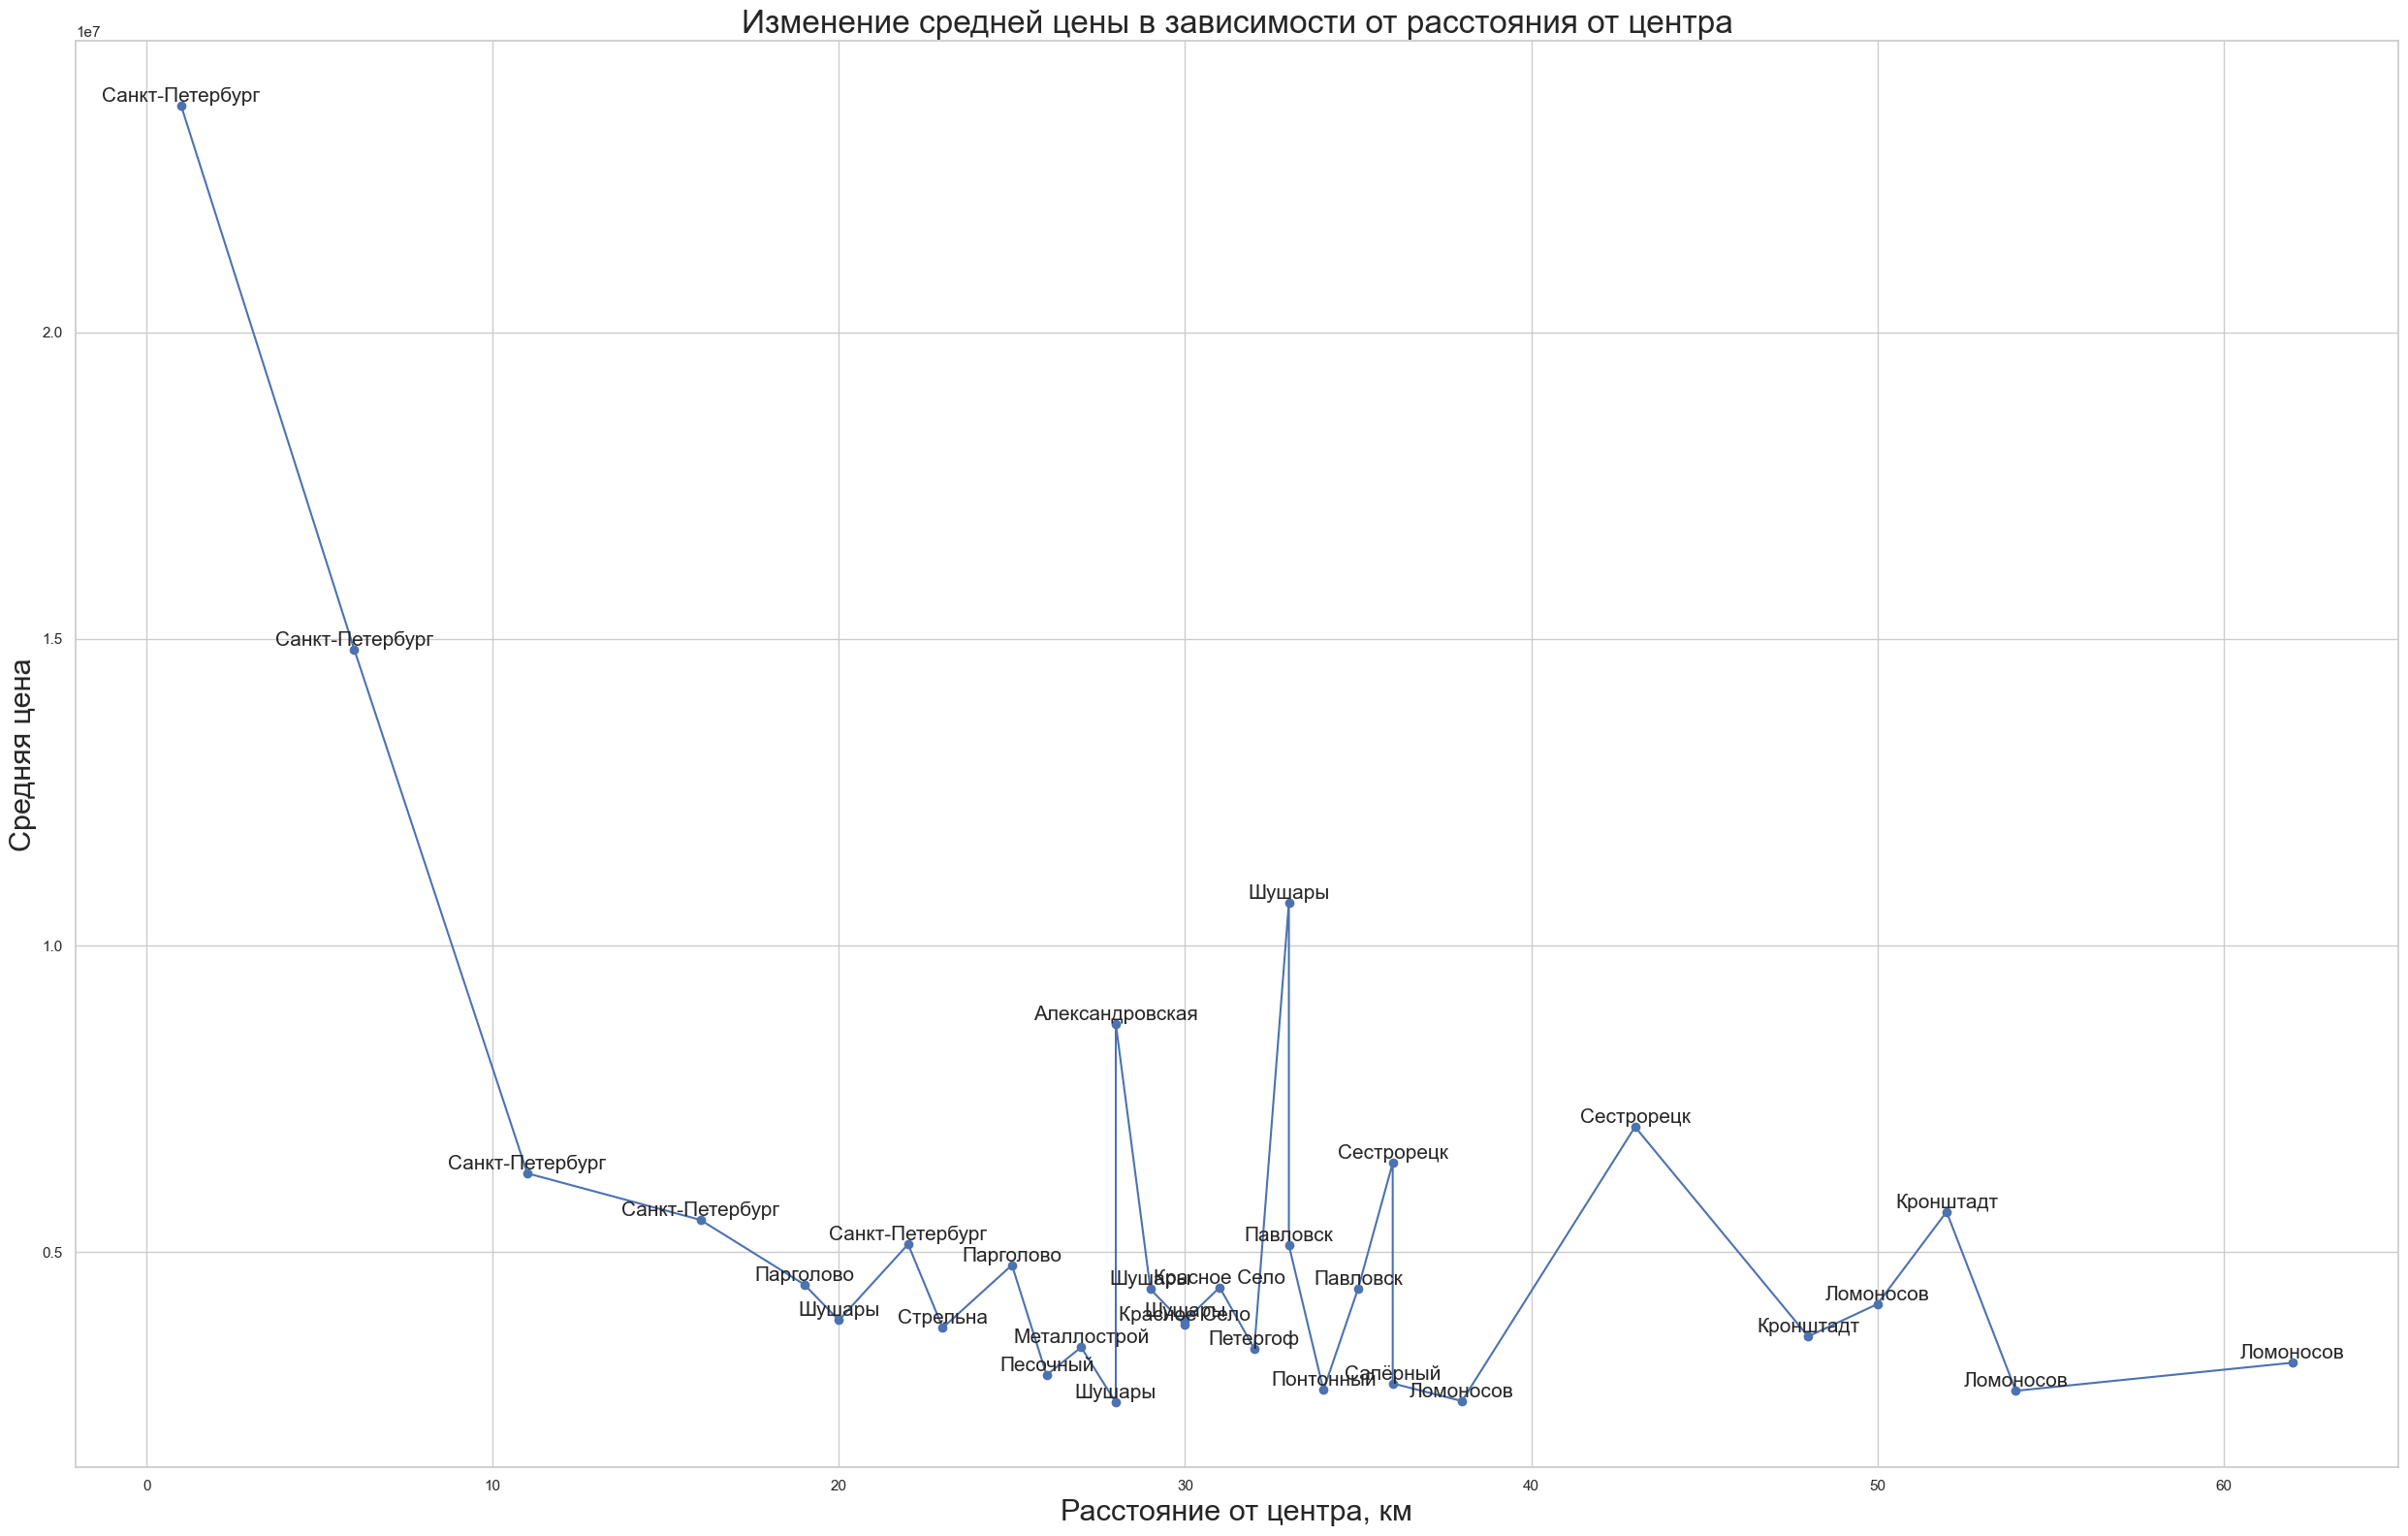

posx and posy should be finite values
posx and posy should be finite values


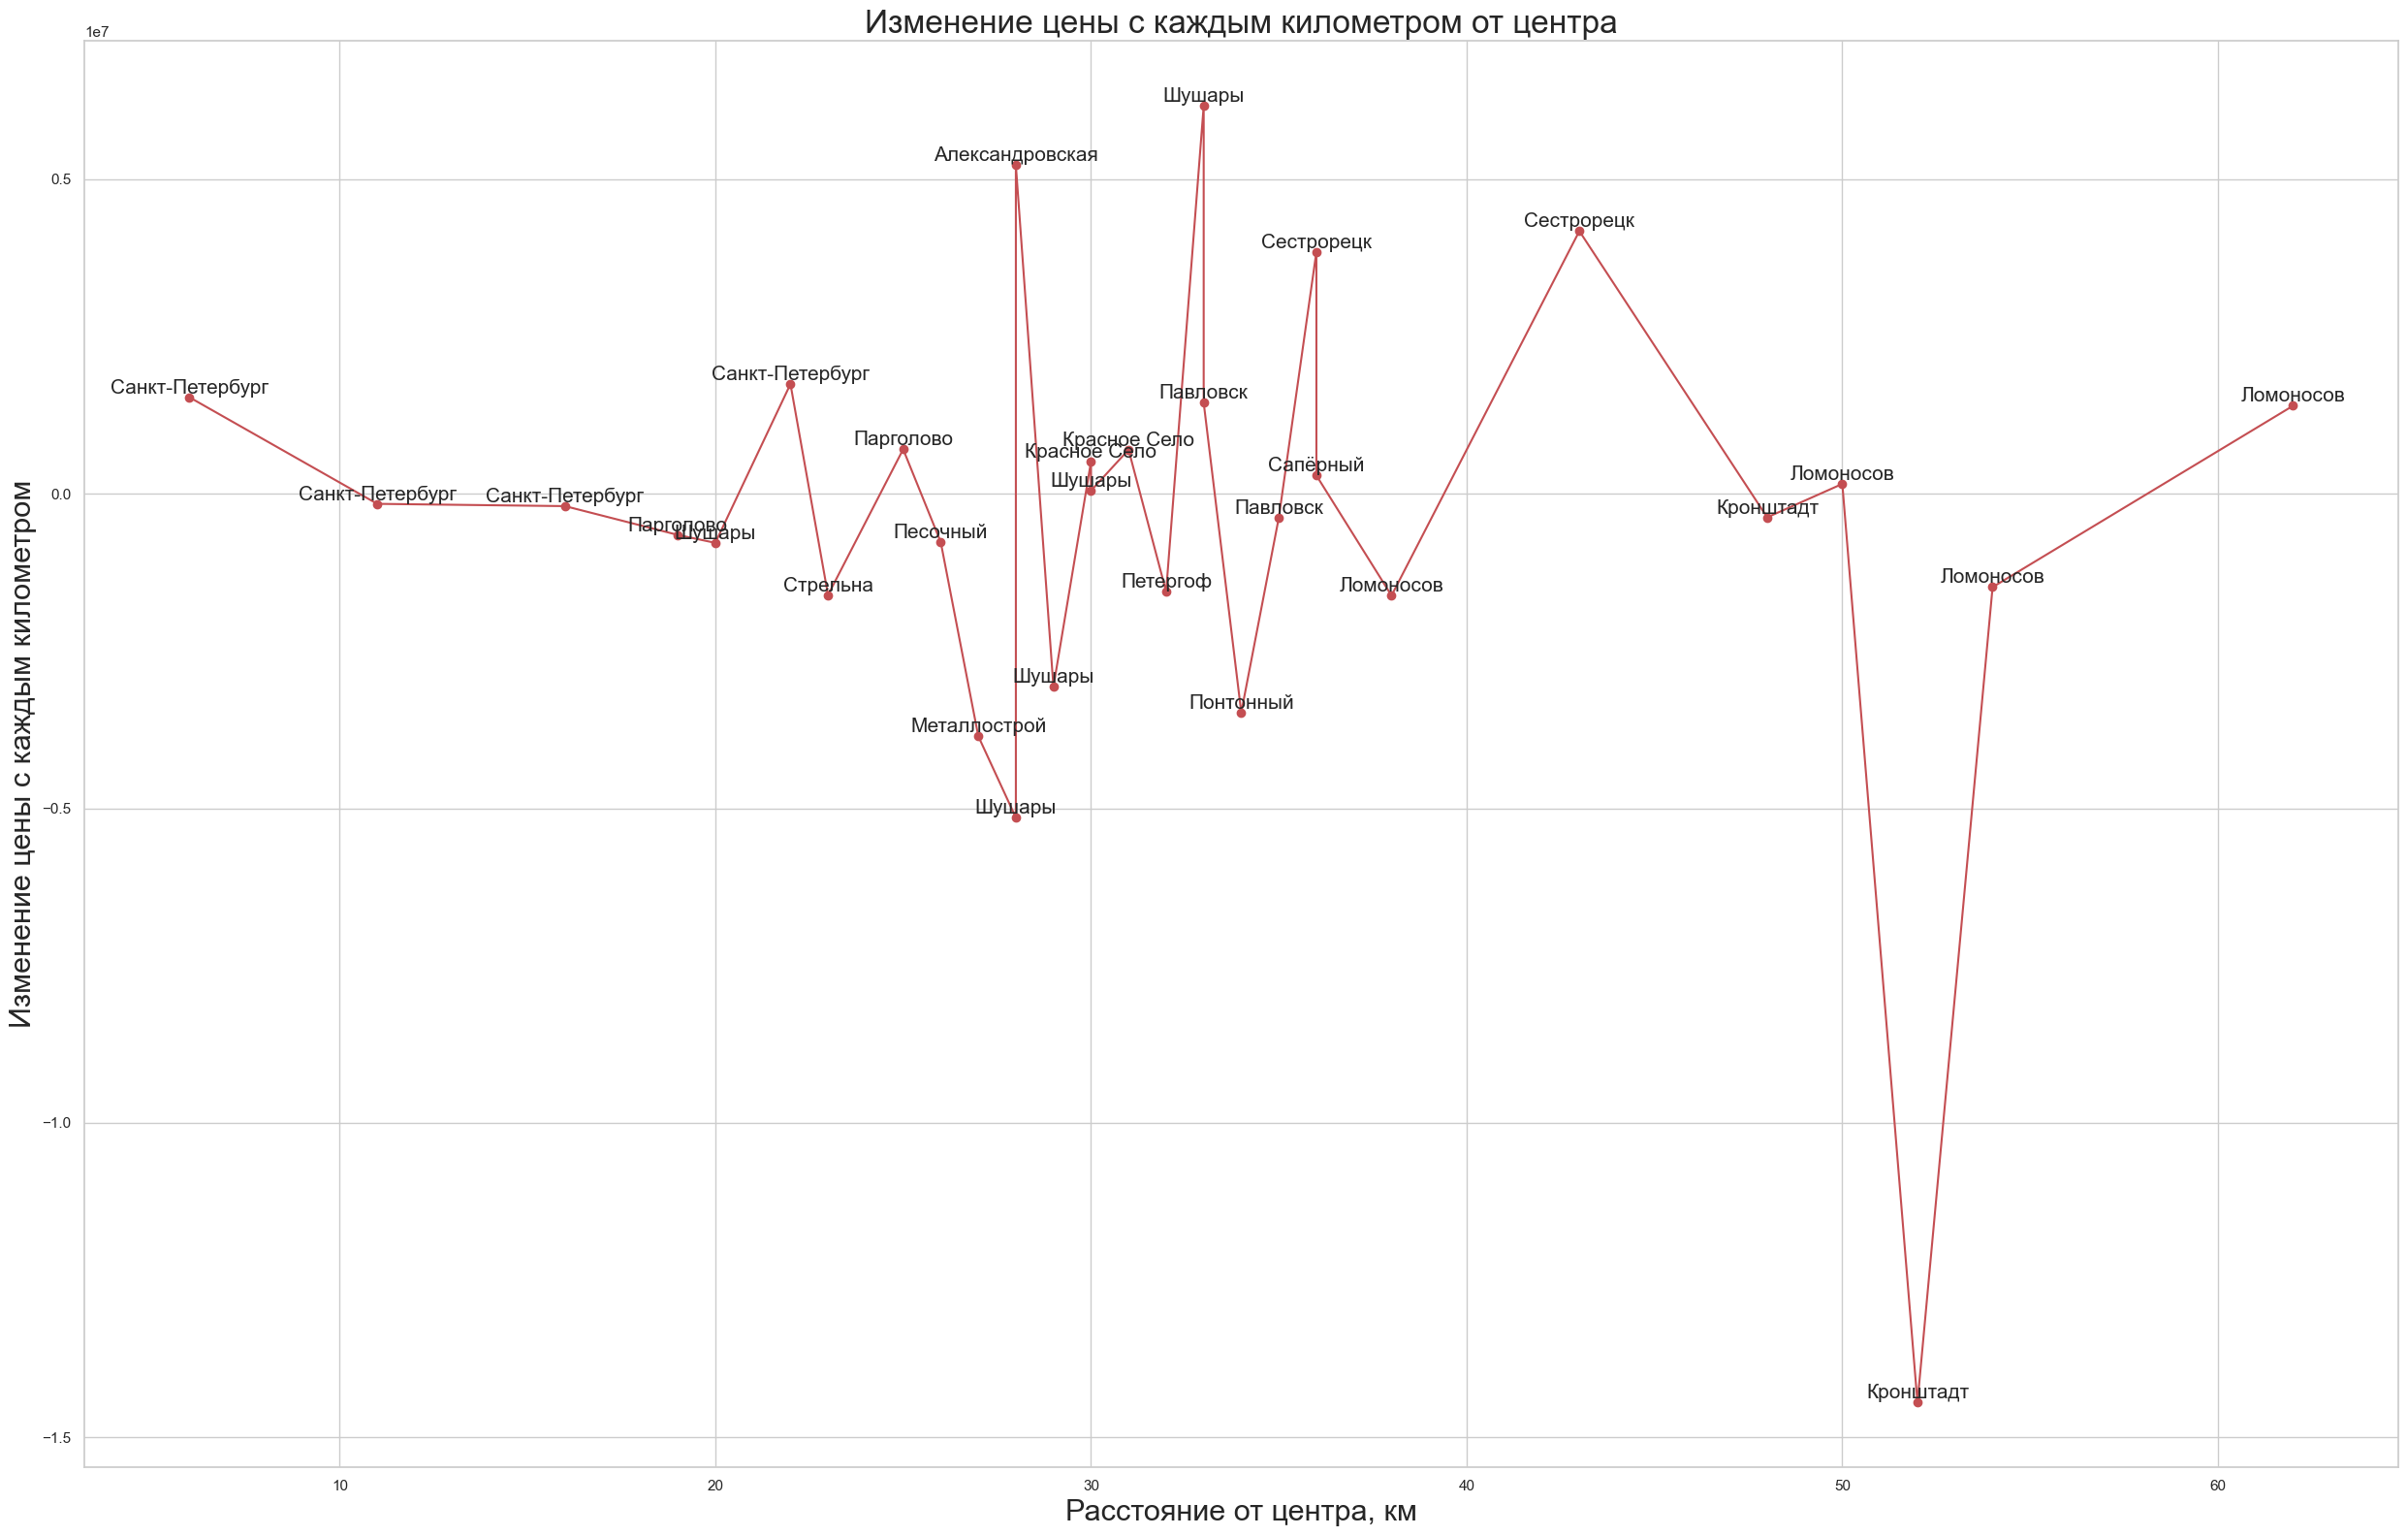

In [61]:
# построим график зависимости цены от удаленности от центра г.Санкт-Петербург

# График изменения средней цены в зависимости от расстояния от центра с указанием населенного пункта
plt.figure(figsize=(25, 16))
plt.plot(price_1km['centre_km'][::5], price_1km['last_price'][::5], marker='o', color='b')
plt.xlabel('Расстояние от центра, км', fontsize=22)
plt.ylabel('Средняя цена', fontsize=22)
plt.title('Изменение средней цены в зависимости от расстояния от центра', fontsize=24)

# Добавляем указание населенного пункта к каждой точке
for i, row in price_1km[::5].iterrows():
    plt.text(row['centre_km'], row['last_price'], row['locality'], fontsize=15, ha='center', va='bottom')

plt.grid(True)
plt.tight_layout()
plt.show()

# График изменения цены с каждым километром от центра с указанием населенного пункта
plt.figure(figsize=(25, 16))
plt.plot(price_1km['centre_km'][::5], price_1km['price_change_per_km'][::5], marker='o', color='r')
plt.xlabel('Расстояние от центра, км', fontsize=22)
plt.ylabel('Изменение цены с каждым километром', fontsize=22)
plt.title('Изменение цены с каждым километром от центра', fontsize=24)

# Добавляем указание населенного пункта к каждой точке
for i, row in price_1km[::5].iterrows():
    plt.text(row['centre_km'], row['price_change_per_km'], row['locality'], fontsize=15, ha='center', va='bottom')

plt.grid(True)
plt.tight_layout()
plt.show()


Средняя цена недвижимости снижается по мере удаления от центра города. Наиболее чувствительное снижение наблюдается первые 10 км, например разница цены между 1 и 2 км составляет 4.8 млн.руб. 

С 10 по 20 км по городу идет плавное снижение в диапазоне от 200 до 400 тыс. руб. А вот например пригорорд Шушары и Перголово на том же расстоянии снижается цена на 600 - 1200 тыс. руб. 

От 20 км в основном начинается пригород и там не наблюдается стабильное уменьшение цены, в общем цена ниже чем в Санкт-Петербурге, но в каждом населенном пункте она своя. Например высокой ценой отмечаются населенные пункты Александровская, Шушары, Сестрорецк.

Посмотрим другие интересные особенности и зависимости, которые существует на рынке.

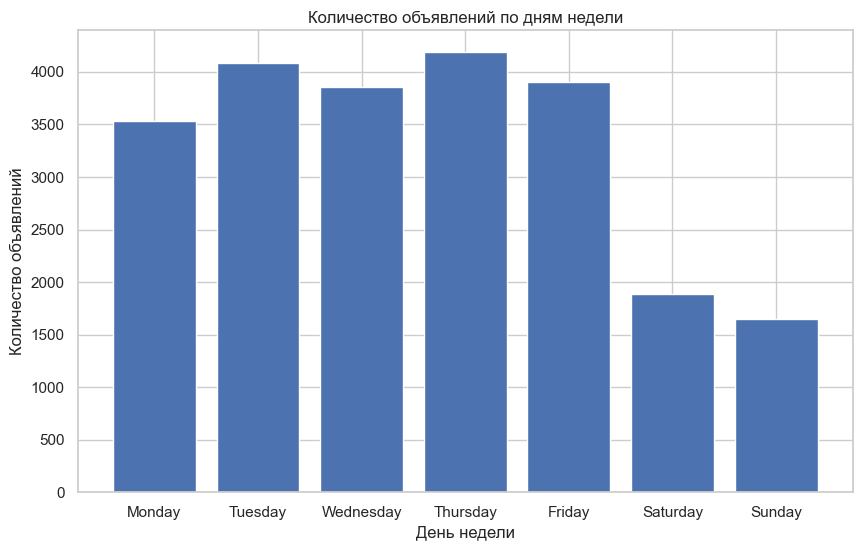

In [62]:
# посмотрим в какой день недели чаще публикуют объявление 

df_grouped = df.groupby('weekday', as_index=False).size()

custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_grouped['weekday'] = pd.Categorical(df_grouped['weekday'], categories=custom_order, ordered=True)

df_grouped = df_grouped.sort_values('weekday')

plt.figure(figsize=(10, 6))

plt.bar(df_grouped['weekday'], df_grouped['size'])

plt.xlabel('День недели')
plt.ylabel('Количество объявлений')
plt.title('Количество объявлений по дням недели')

plt.show()

Чаще всего объявление публикуют в четверг, во вторник и в пятницу (в порядке убывания), реже всего в выходные дни.

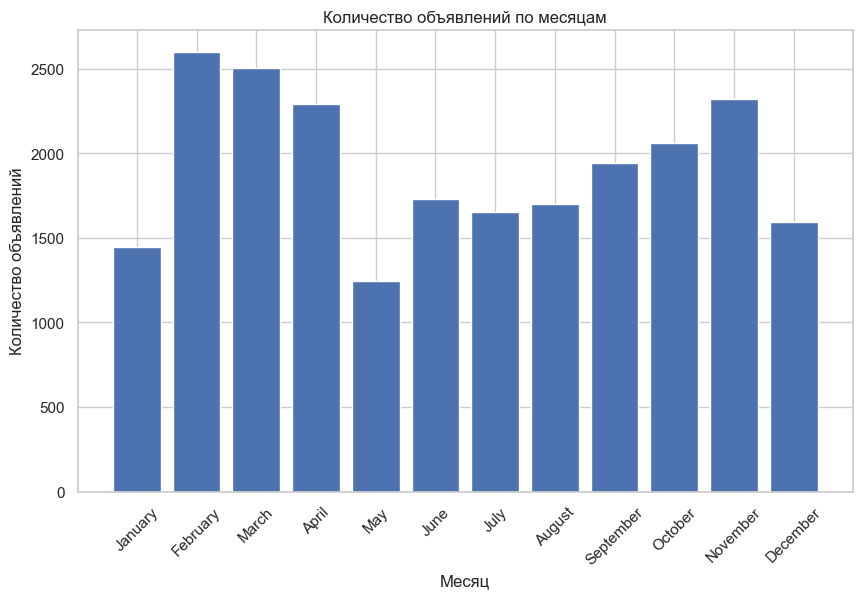

In [63]:
# посмотрим в какой месяц чаще публикуют объявление 

df_grouped_2 = df.groupby('month', as_index=False).size()

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df_grouped_2['month'] = pd.Categorical(df_grouped_2['month'], categories=months_order, ordered=True)
df_grouped_2 = df_grouped_2.sort_values('month')

months = df_grouped_2['month']
sizes = df_grouped_2['size']

plt.figure(figsize=(10, 6))
plt.bar(months, sizes)

plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')
plt.title('Количество объявлений по месяцам')

plt.xticks(rotation=45)
plt.show()

Наименее популярный месяц для публикации является май, чаще всего публикуют в феврале, марте, апреле и в 
ноябре. 

In [64]:
# найдем количество объявлений по годам

df_grouped_3 = df.groupby('month_year', as_index=False).size().sort_values('month_year',  ascending=True)


df_grouped_3


,month_year,size
0,01-2015,65
1,01-2016,116
2,01-2017,284
3,01-2018,585
4,01-2019,399
5,02-2015,62
6,02-2016,253
7,02-2017,431
8,02-2018,1318
9,02-2019,538


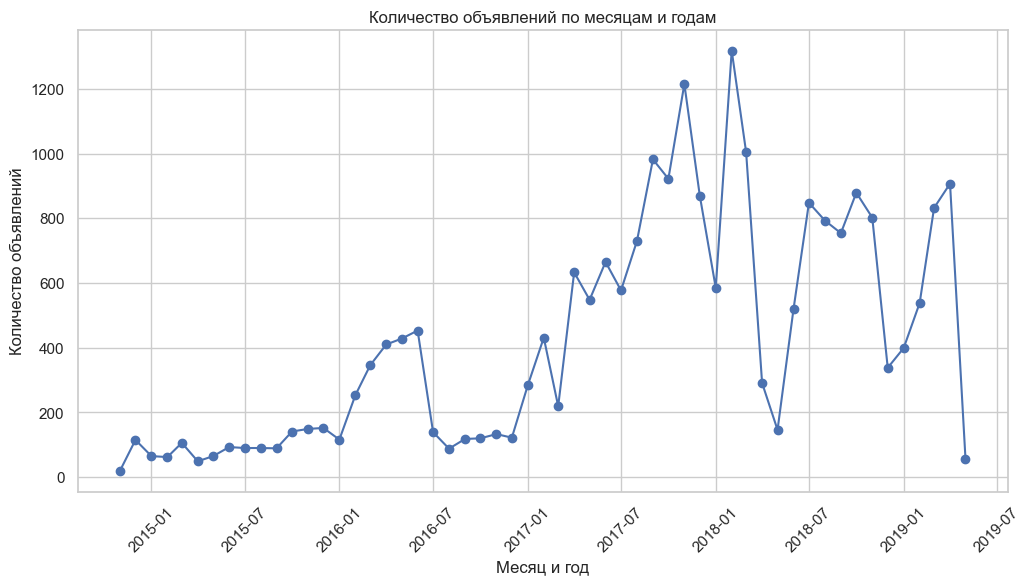

In [65]:
# построим график распределения количества объявлений по годам

df['month_year'] = pd.to_datetime(df['month_year'])


df_grouped = df.groupby(['month_year']).size().reset_index(name='size')

plt.figure(figsize=(12, 6))
plt.plot(df_grouped['month_year'], df_grouped['size'], marker='o', linestyle='-')
plt.xlabel('Месяц и год')
plt.ylabel('Количество объявлений')
plt.title('Количество объявлений по месяцам и годам')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


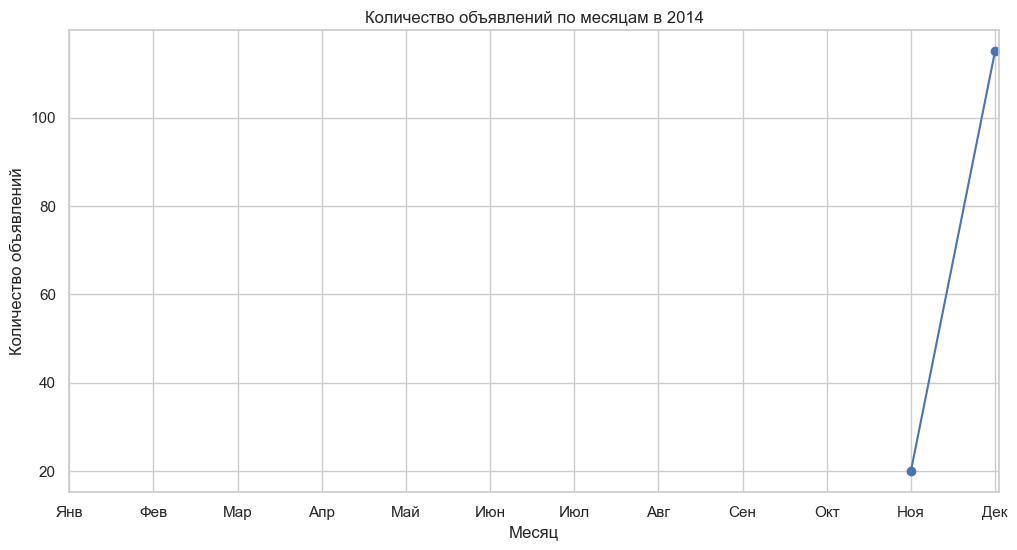

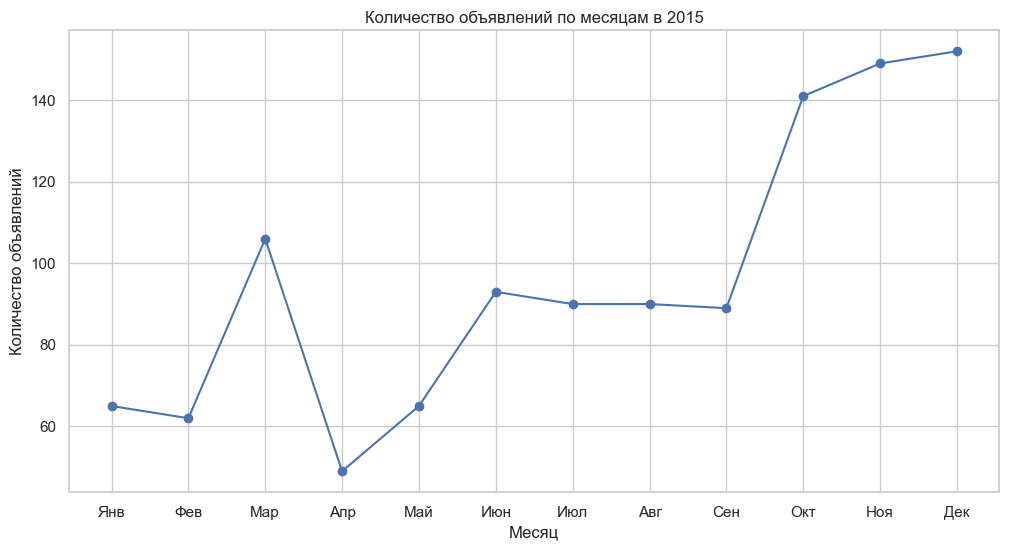

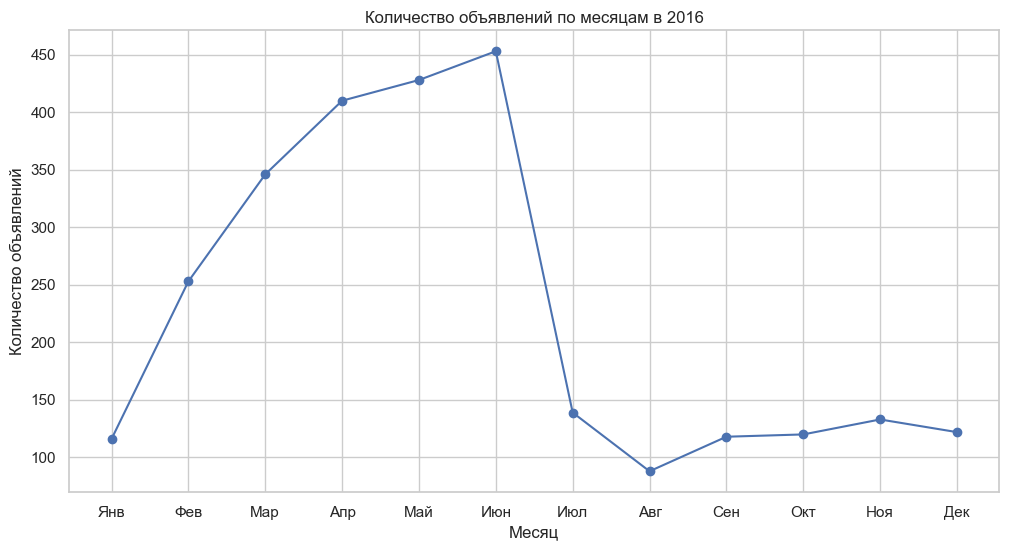

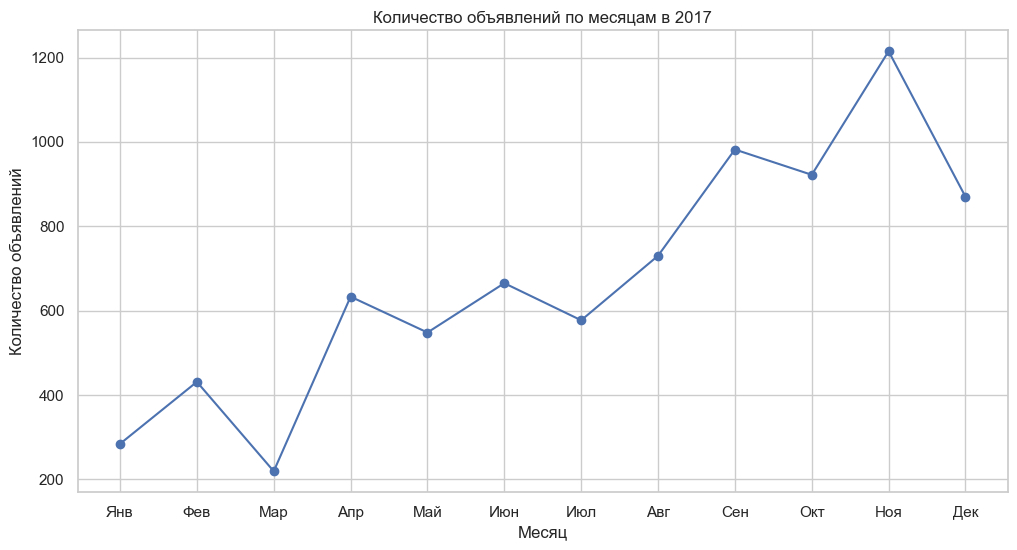

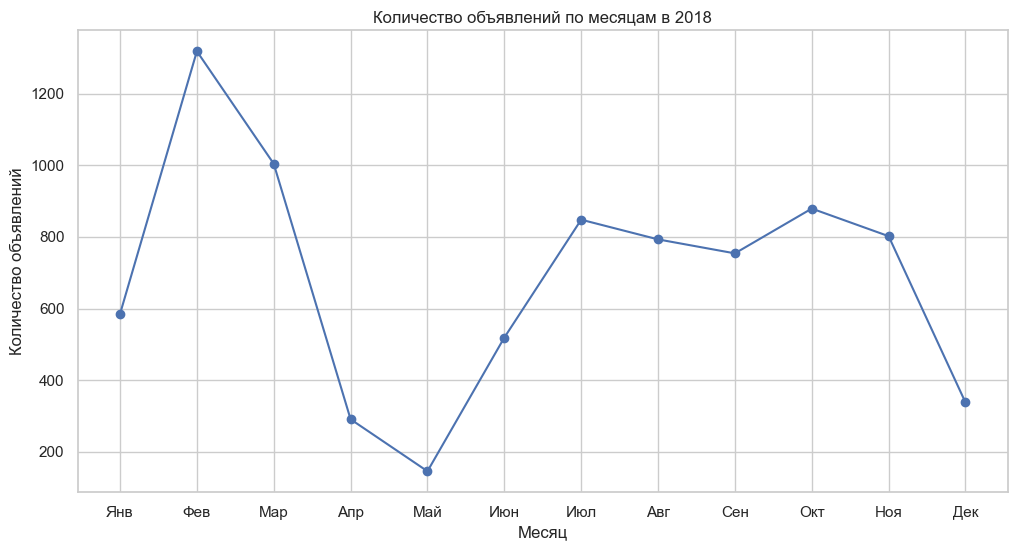

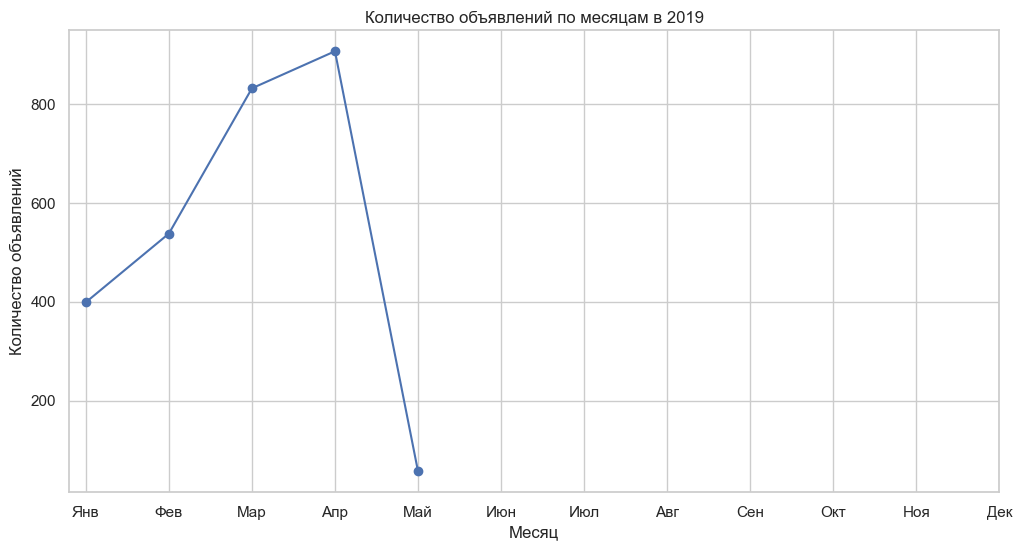

In [66]:
# построи графики по годам

df['month_year'] = pd.to_datetime(df['month_year'])

df['year'] = df['month_year'].dt.year


groups = df.groupby(['year', df['month_year'].dt.month]).size().reset_index(name='size')

for year, group in groups.groupby('year'):
    plt.figure(figsize=(12, 6))
    plt.plot(group['month_year'], group['size'], marker='o', linestyle='-')
    plt.xlabel('Месяц')
    plt.ylabel('Количество объявлений')
    plt.title(f'Количество объявлений по месяцам в {year}')
    plt.xticks(range(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
    plt.grid(True)
    plt.show()




Количество объявлений варьируется от месяца к месяцу и имеет различные пики и спады.
Наибольшее количество объявлений было в месяце феврале 2018 года (1318 объявлений), а наименьшее количество - в январе 2014 года (20 объявлений).
На гарфиках по годам не наблюдается сезонности, рынок реагирует на текущие события. 
На общем графике стоит обратить внимание на резкий рост количества объявлений в феврале 2018 года (1318 объявлений), что может быть связано с каким-то значимым событием.

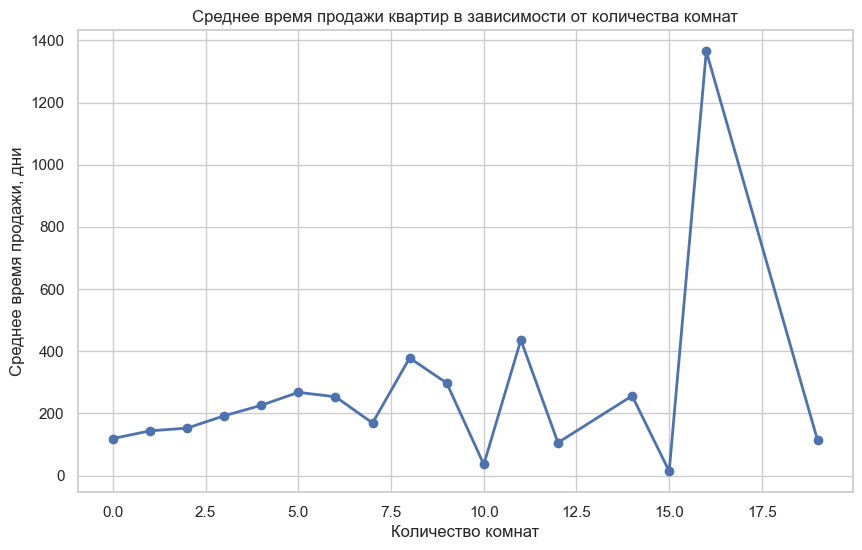

In [77]:
# посмотрим сколько по времени в среднем продается квартира
  
grouped_df_5 = df.groupby('rooms', as_index=False).agg({'days_exposition': 'mean'})

plt.figure(figsize=(10, 6))
plt.plot(grouped_df_5['rooms'], grouped_df_5['days_exposition'], marker='o', color='b', linestyle='-', linewidth=2)
plt.xlabel('Количество комнат')
plt.ylabel('Среднее время продажи, дни')
plt.title('Среднее время продажи квартир в зависимости от количества комнат')
plt.grid(True)
plt.show()  


In [78]:
grouped_df_5

,rooms,days_exposition
0,0,119.29
1,1,144.02
2,2,152.76
3,3,192.48
4,4,226.15
5,5,267.80
6,6,253.57
7,7,169.23
8,8,378.36
9,9,297.71


Самый быстро продаваемыми квартирами стали 10 и 15-комнатные квартиры 36 и 14 дней, скорее всего это исключение. Если мы исключим эти данные, то наиболее быстро продаваемыми стали квартиры студии и однокомнатные квартиры период публикации составляет 3-4 месяца. Наибольшее количество квартир продаются в течении 9 месяцев. 

### Вывод

Исследовательский анализ объявлений о продаже квартир в Санкт-Петербурге и в прилегающих населенных пунктах проходил по намечанному плану: 
1. Обзор данных: изучила структуру и содержание предоставленного датасета, выявила пропущенные значения и дубликаты, а также провела первичный анализ основных параметров квартир.
2. Предобработка данных: чтобы данные были готовы к дальнейшему анализу, заполнила пропуски, изменила типы данных, устранила выбросы и аномалии.
3. Исследовательский анализ: провела анализ факторов, влияющих на цену квартир, выявила корреляцию между различными параметрами и обнаружила интересные закономерности на рынке недвижимости.

Исследовательский проект позволил определить рыночную стоимость объектов недвижимости в Санкт-Петербурге и его пригородах на основе предоставленных данных.  

В результате анализа статистических данных было выявлено, что средняя цена квартиры в Санкт-Петербурге значительно выше, чем в пригороде.
Средняя цена квартиры в городе составляет около 8 млн. рублей, в то время как в пригороде – 3,5 млн рублей.  
Средняя площадь  в городе выше и составляет 64 кв.м. по сравнению с пригородом  - 51.5 кв.м. Получается, что цена в пригороде меньше на 55.8%, а площадь всего на 19.5%. 
Средняя цена одного кв. м. в городе на 46 тыс. выше, чем в пригороде и составляет 114.6 тыс. руб.
Средняя площадь с 0 до 4 комнат в обоих случаях практически одинаковая. В пригороде средняя площадь квартир с 6 комнатами и более значительно выше, чем в городе.Средняя площадь 6-комнатной квартиры в пригороде больше на 8,5%.  Что касается  7-комнатной квартиры, то средняя площадь в пригороде больше на 44%, а цена меньше на 10 млн. руб.  
Также цена изменяется в зависимости от удаленности от центра города
Санкт-Петербург. Средняя цена недвижимости снижается по мере удаления от центра города. Наиболее чувствительное снижение наблюдается первые 10 км, например разница цены между 1 и 2 км составляет 4.8 млн.руб. 
С 10 по 20 км по городу идет плавное снижение в диапазоне от 200 до 400 тыс. руб. А вот например пригорорд Шушары и Перголово на том же расстоянии снижается цена на 600 - 1200 тыс. руб. 
От 20 км в основном начинается пригород и там не наблюдается стабильное уменьшение цены, в общем цена ниже чем в Санкт-Петербурге, но в каждом населенном пункте она своя. Например высокой ценой отмечаются населенные пункты Александровская, Шушары, Сестрорецк.

Основными факторами влияющие на цену квартиры являются: общая и жилая площадь квартиры  и площадь кухни. Это ожидаемо, так как обычно более просторные квартиры имеют более высокую цену. Средняя зависимость наблюдается  от числа комнат.  Этаж, наличие парка или водоема слабо коррелирует с ценой на жилье.

Также стоит отметить и интересные особенности, которые существуют на рынке недвижимости в Санкт-Петербурге и пригороде. Например Чаще всего объявление публикуют в будние дни, в выходные дни видимо жители предпочитают отдыхать, что также отмечается в выборе месяца с самым низким количеством подач объявлений – это май. Что касается продолжительности публикации, то самыми быстро продаваемыми квартирами стали 10 и 15-комнатные квартиры 36 и 14 дней публикации, скорее всего это исключение. Если мы исключим эти данные, то наиболее быстро продаваемыми стали квартиры студии и однокомнатные квартиры период публикации составляет 3-4 месяца. Наибольшее количество квартир продаются в течении 9 месяцев.

Таким образом, исследование позволяет сделать вывод о значительном различии в ценах на недвижимость между Санкт-Петербургом и его пригородом, что может быть важным фактором при принятии решения о покупке жилья в данном регионе.



